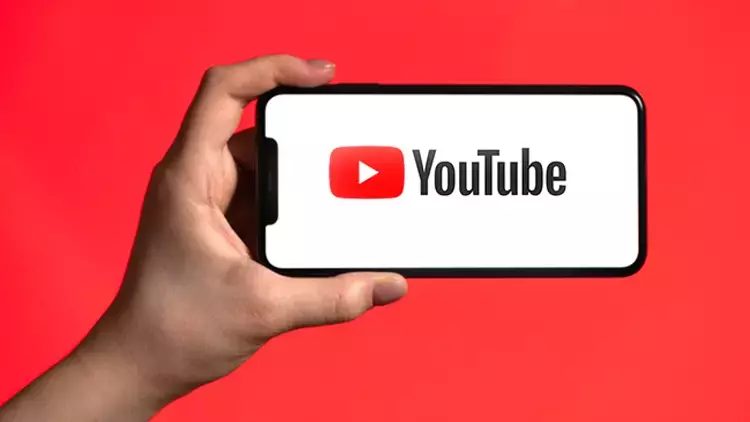

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene, ttest_ind, mannwhitneyu
import scipy.stats as stats
import pylab

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv



# VERİ YÜKLEME

-----------------------------

# DATA UPLOAD

In [2]:
df = pd.read_csv(r"/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv", encoding="latin-1")

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# VERİ TANIMA
-----------------------------

# DATA RECOGNITION

In [4]:
def veriözellikleri(dataframe,head=True):
    print("------------------------------------INFO--------------------------------------------")
    print(dataframe.info())
    print("------------------------------------SHAPE-------------------------------------------")
    print(dataframe.shape)
    print("------------------------------------ISNULL------------------------------------------")
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print("------------------------------------NUNİQUE-----------------------------------------")
    print(dataframe.nunique())
    print("------------------------------------DESCRİBE----------------------------------------")
    display(dataframe.describe())
    if head:
       print("------------------------------------HEAD--------------------------------------------")
       display(dataframe.head())
       print("------------------------------------TAİL--------------------------------------------")
       display(dataframe.tail())

In [5]:
veriözellikleri(df,head=True)

------------------------------------INFO--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                       

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


------------------------------------HEAD--------------------------------------------


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


------------------------------------TAİL--------------------------------------------


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# DEĞİŞKEN ATAMASI 

-----------------------------------------------------------------
# VARİABLE ASSİGNMENT

In [6]:
def değişken(dataframe):
    cats = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    nums = [col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    return cats,nums

In [7]:
cats,nums = değişken(df)

In [8]:
df[cats]

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep
...,...,...,...,...,...,...,...
990,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb
991,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep
992,Panda,NaN,HybridPanda,United Kingdom,GB,Games,Sep
993,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May


In [9]:
df[nums]

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,1200,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,700000.0,2017.0,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,1500,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,300000.0,2018.0,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,2452,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,...,3.200000e+03,1000.0,2006.0,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,39,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,100000.0,2012.0,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


# EKSİK DEĞERLERİN DOLDURULMASI

-----------------------------------------------------------------------

# FILLING THE MISSING VALUES


**Nümerik Değişkenler**
Nümerik değişkenlerdeki eksik değerleri ortalama değerleriyle doldurdum.

In [10]:
df[nums] = df[nums].fillna(df[nums].mean())

In [11]:
df[nums].isnull().sum()

rank                                       0
subscribers                                0
video views                                0
uploads                                    0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_date                               0
Gross tertiary education enrollment (%)    0
Population                                 0
Unemployment rate                          0
Urban_population                           0
Latitude                                   0
Longitude                                  0
dtype: int64

In [12]:
df1 = df.copy

**Kategorik Değişkenler:**
Mod değerleriyle doldurdum en sık görülen veriyi eksik değer yerine doldurmuş oldum.

**Ülke ve Ülke kısaltmasını belirli bir yönteme göre  dolduramayacağımız için bu değişkenlerdeki eksik değerlere silme işlemi gerçekleştirdim.**

In [13]:
df = df.dropna(subset=['Abbreviation','Country'])

In [14]:

columns_to_fill = ['category', 'channel_type', 'created_month']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])


/tmp/ipykernel_17/3594718602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])


In [15]:
df[cats].isnull().sum()

Youtuber         0
category         0
Title            0
Country          0
Abbreviation     0
channel_type     0
created_month    0
dtype: int64

In [16]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

# KATEGORİK VERİLERİN GÖRSELLEŞTİRİLMESİ

----------------------------------------------------------------------------

# VISUALIZATION OF CATEGORICAL DATA

In [17]:
def cats_plot(dataframe, colname):
    # İlk 10 en yüksek değeri almak
    top_10 = dataframe[colname].value_counts().head(10)
    
    # countplot grafiğini sadece en sık görülen ilk 10 değeri gösterecek şekilde çizmek
    sns.countplot(data=dataframe, x=colname, palette="Set2", order=top_10.index)
    
    # X ekseni etiketlerini döndürmek (kategorik isimlerin üst üste binmemesi için)
    plt.xticks(rotation=45, ha='right')
    
    plt.title(f"Top 10 {colname.upper()}")
    plt.tight_layout()
    plt.show()

    # En sık görülen 10 değeri yazdırmak
    print(top_10)
    print("----------------------------------------------------------------------", end="\n\n")


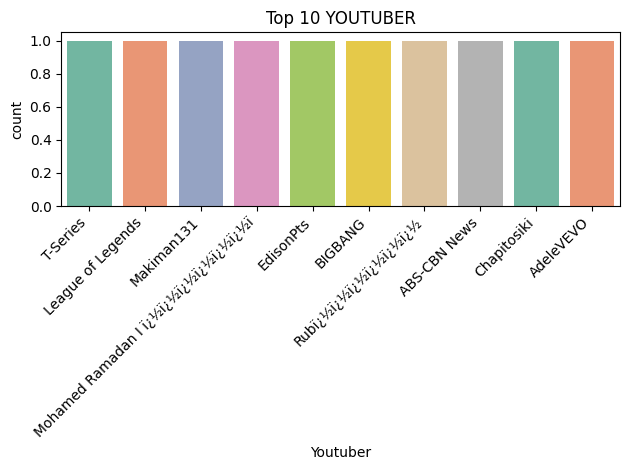

Youtuber
T-Series                                 1
League of Legends                        1
Makiman131                               1
Mohamed Ramadan I ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï    1
EdisonPts                                1
BIGBANG                                  1
Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½                    1
ABS-CBN News                             1
Chapitosiki                              1
AdeleVEVO                                1
Name: count, dtype: int64
----------------------------------------------------------------------



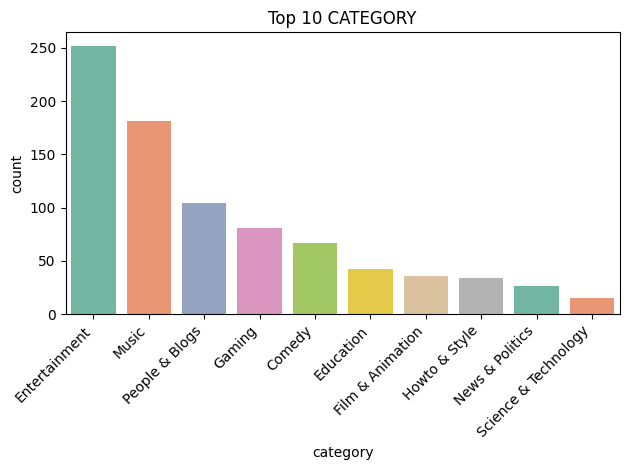

category
Entertainment           252
Music                   181
People & Blogs          104
Gaming                   81
Comedy                   67
Education                42
Film & Animation         36
Howto & Style            34
News & Politics          26
Science & Technology     15
Name: count, dtype: int64
----------------------------------------------------------------------



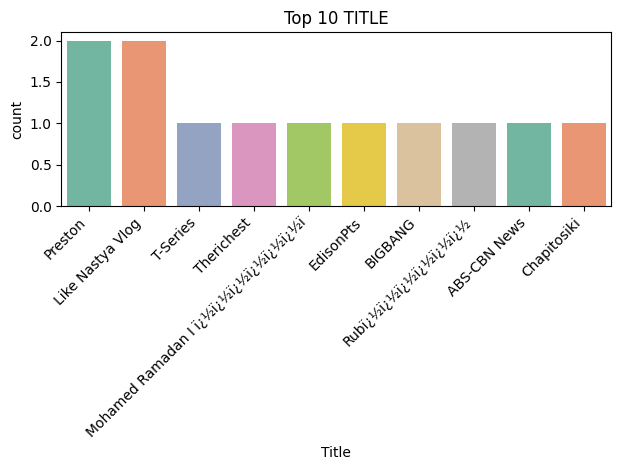

Title
Preston                                  2
Like Nastya Vlog                         2
T-Series                                 1
Therichest                               1
Mohamed Ramadan I ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï    1
EdisonPts                                1
BIGBANG                                  1
Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½                    1
ABS-CBN News                             1
Chapitosiki                              1
Name: count, dtype: int64
----------------------------------------------------------------------



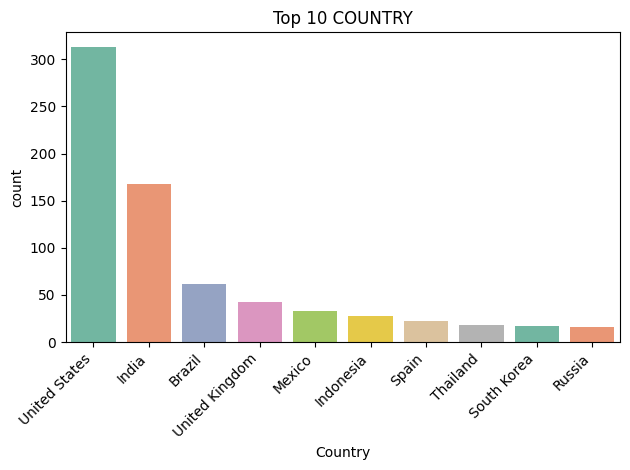

Country
United States     313
India             168
Brazil             62
United Kingdom     43
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             16
Name: count, dtype: int64
----------------------------------------------------------------------



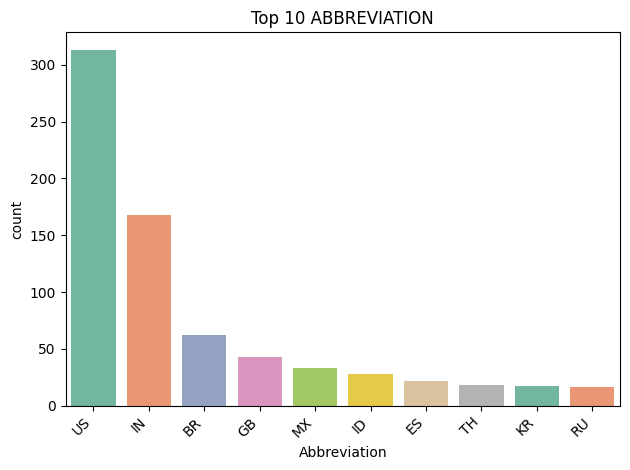

Abbreviation
US    313
IN    168
BR     62
GB     43
MX     33
ID     28
ES     22
TH     18
KR     17
RU     16
Name: count, dtype: int64
----------------------------------------------------------------------



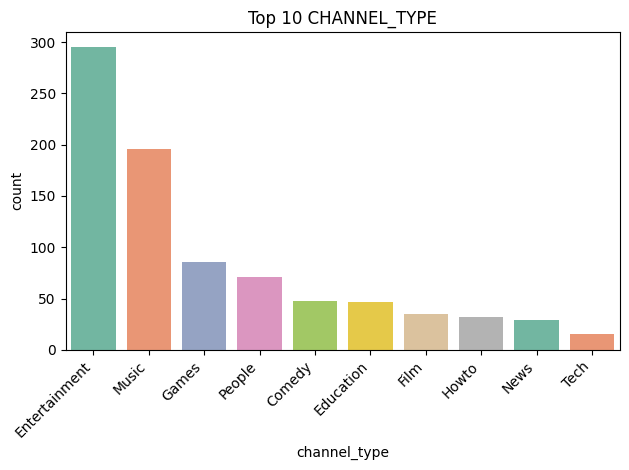

channel_type
Entertainment    295
Music            196
Games             86
People            71
Comedy            48
Education         47
Film              35
Howto             32
News              29
Tech              15
Name: count, dtype: int64
----------------------------------------------------------------------



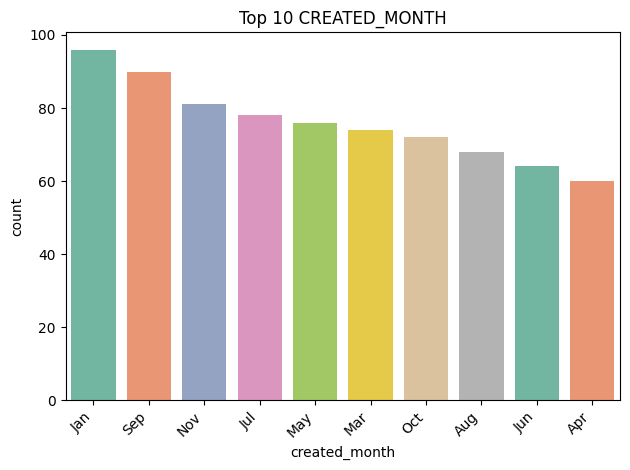

created_month
Jan    96
Sep    90
Nov    81
Jul    78
May    76
Mar    74
Oct    72
Aug    68
Jun    64
Apr    60
Name: count, dtype: int64
----------------------------------------------------------------------



In [18]:
for col in cats:
    cats_plot(df,col)

# SAYISAL VERİLERİN GÖRSELLEŞTİRİLEMSİ

------------------------------------------------------------------------

# VISUALIZATION OF NUMERICAL DATA

**Nümerik değişkenleri histogram grafiği ile görselleştiryoruz.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


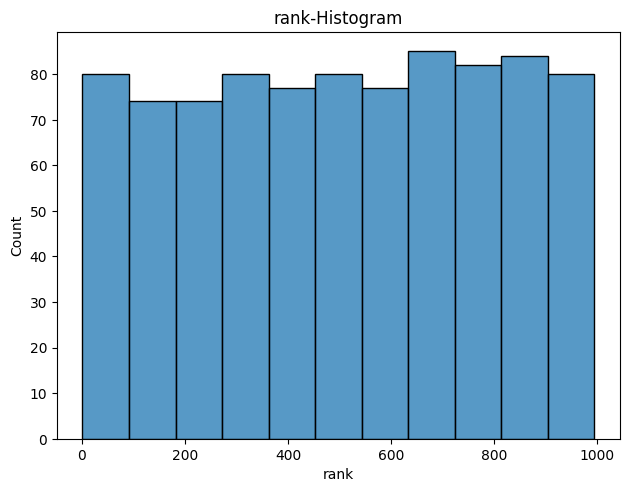

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


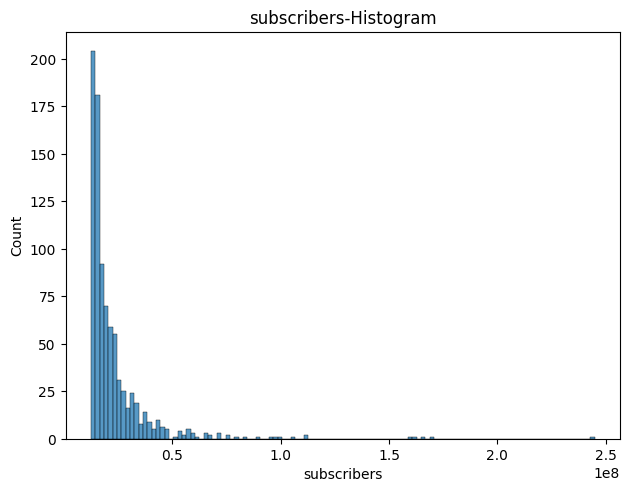

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


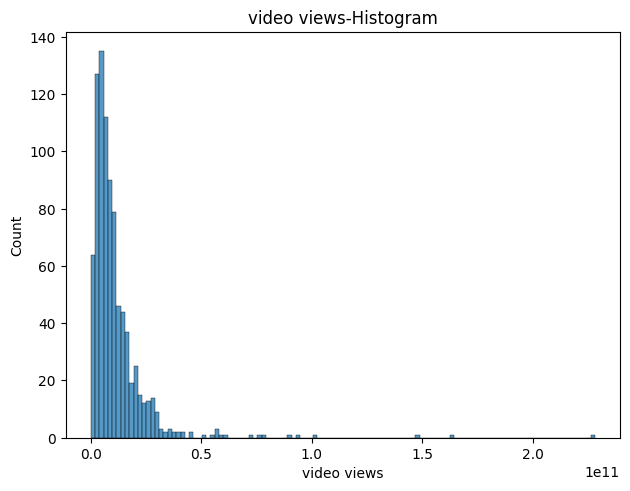

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


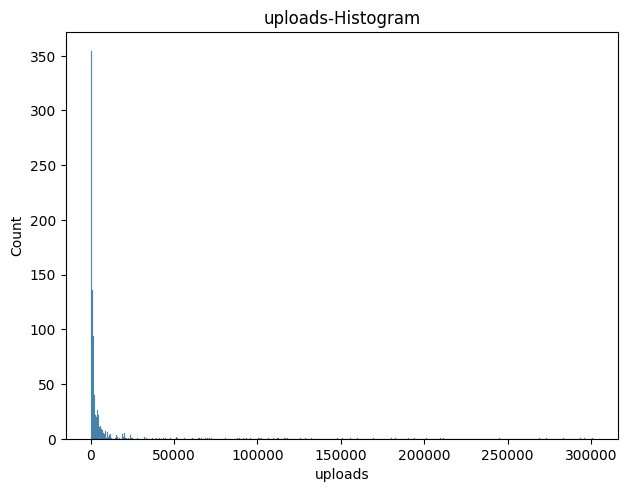

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


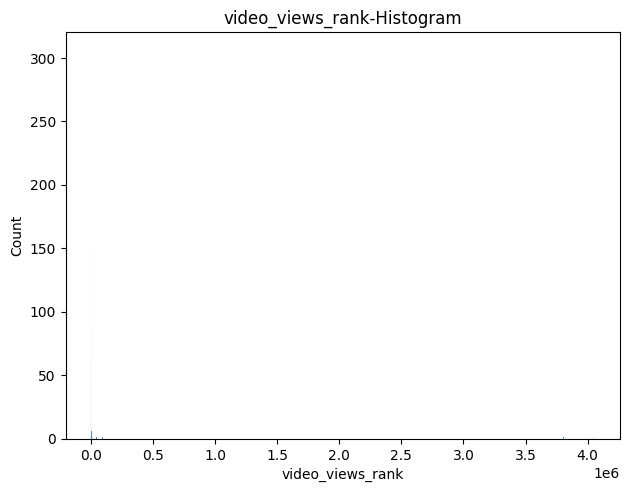

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


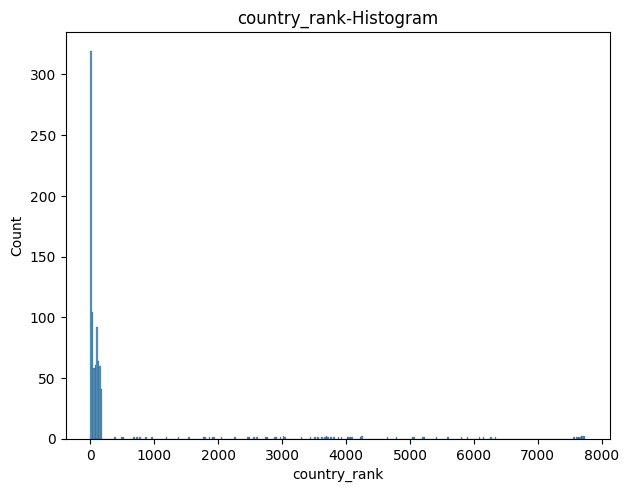

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


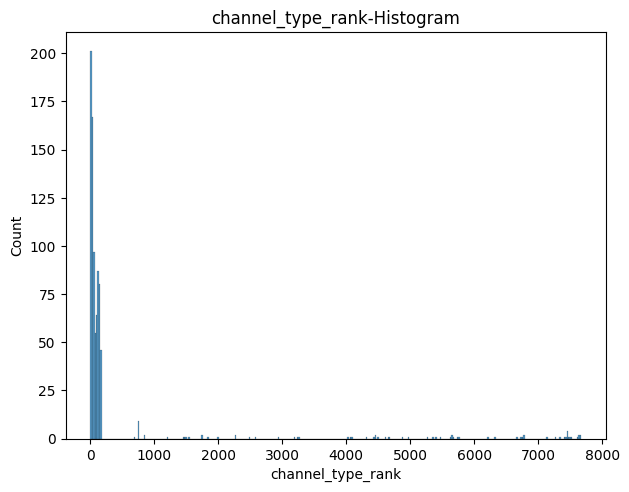

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


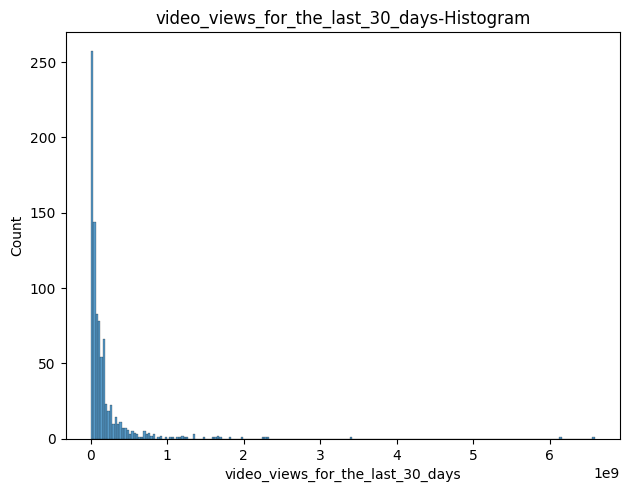

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


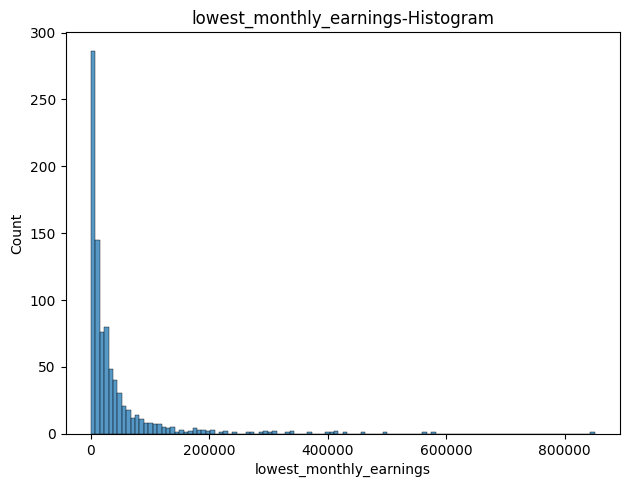

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


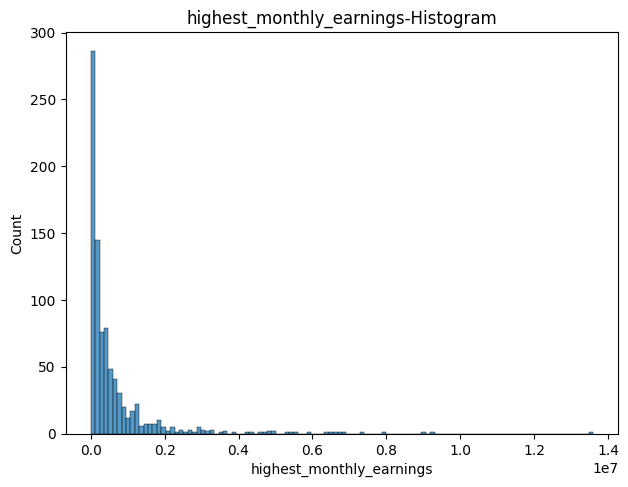

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


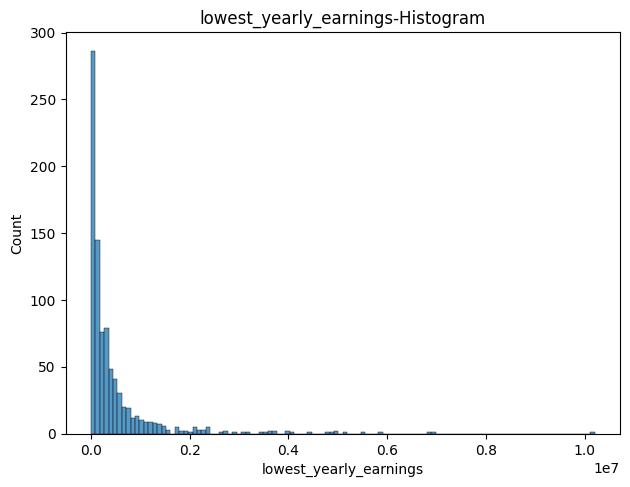

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


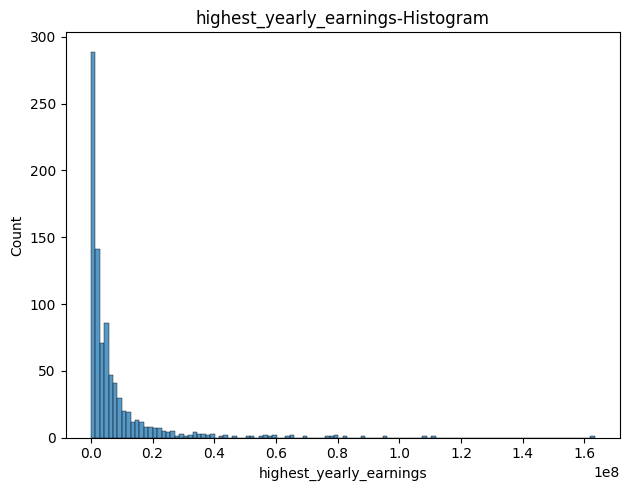

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


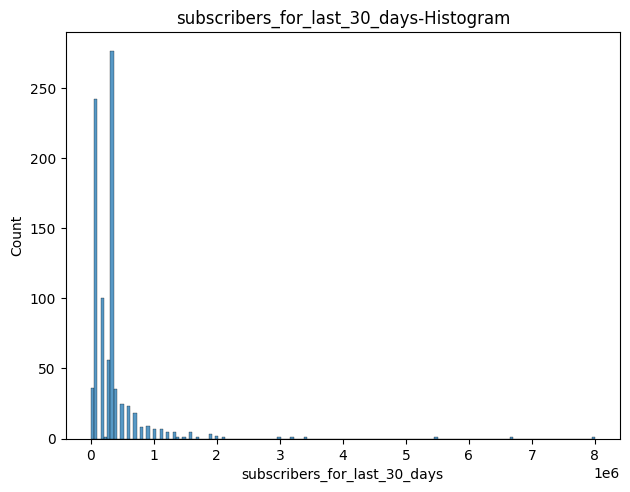

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


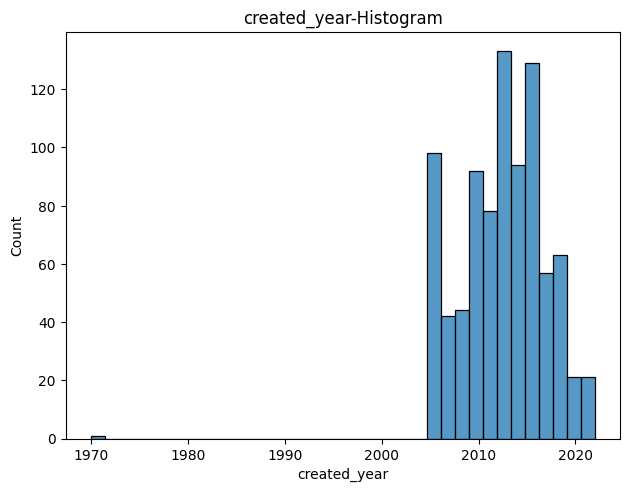

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


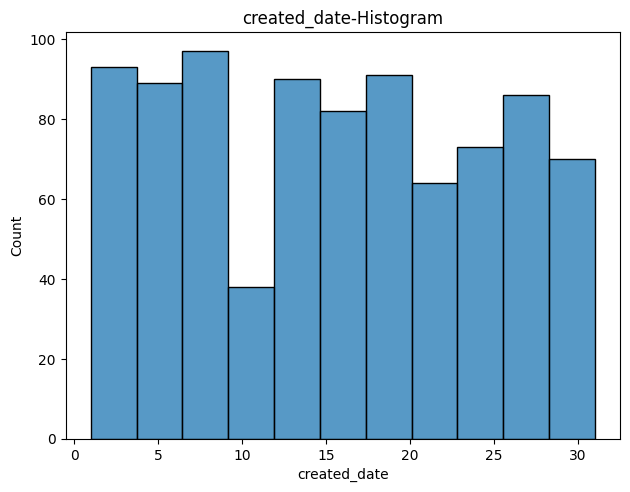

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


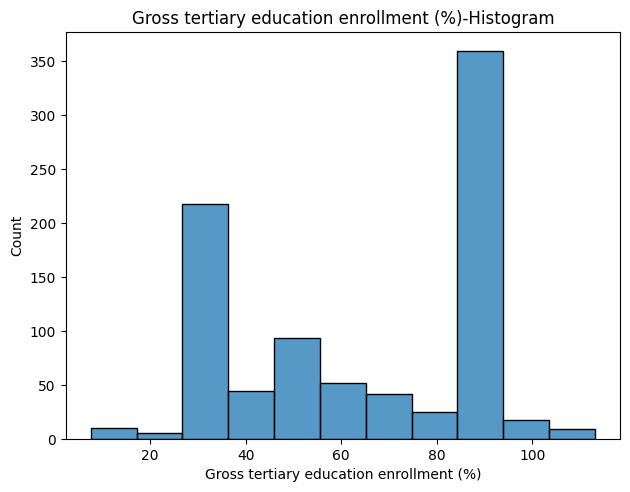

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


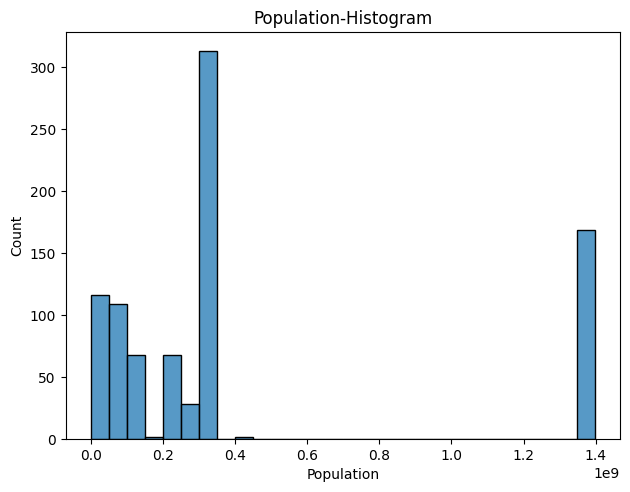

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


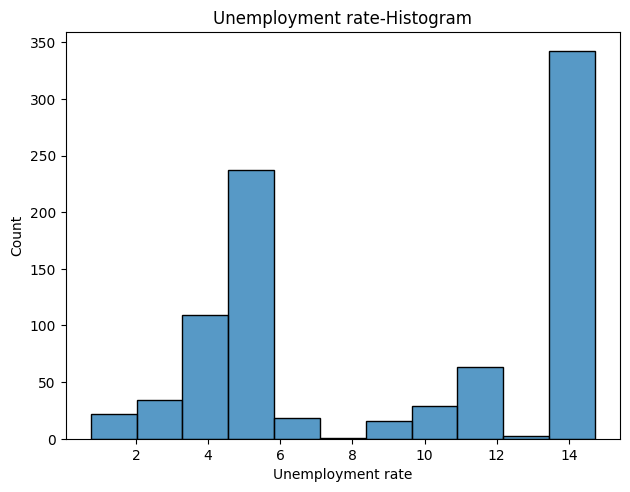

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


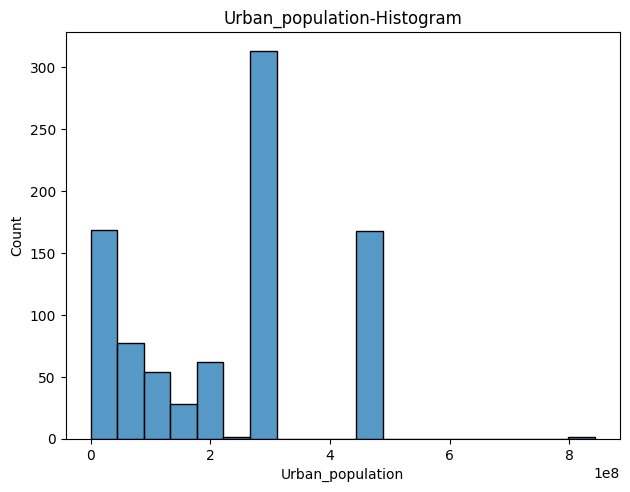

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


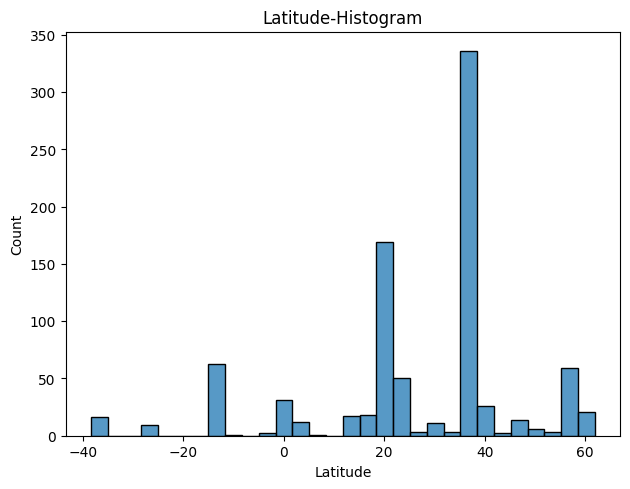

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


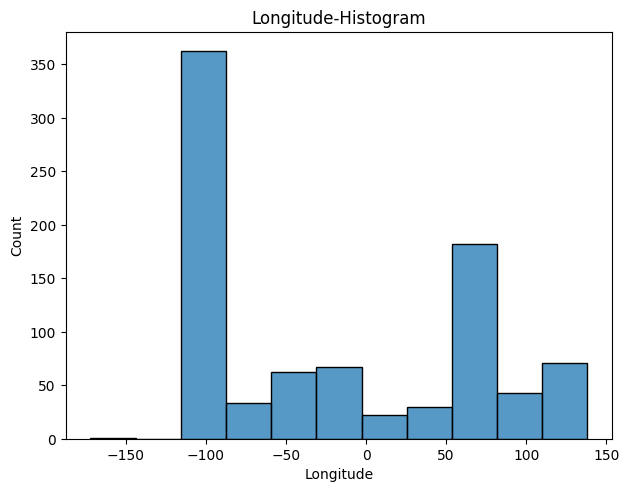

In [19]:
for col in nums:
    sns.histplot(data=df,x=col)
    plt.tight_layout()
    plt.title(f'{col}-Histogram')
    plt.show()

**Sayısal verilerin çoğunun dağılımı sola çarpık olarak oluşmuştur ve normal dağılım çoğu değişkende sağlanmamıştır.**

# Sayısal Verilerin BoxPlot İle Gösterimi

----------------------------------------------------------------------------------

# Viewing Numerical Data with BoxPlot

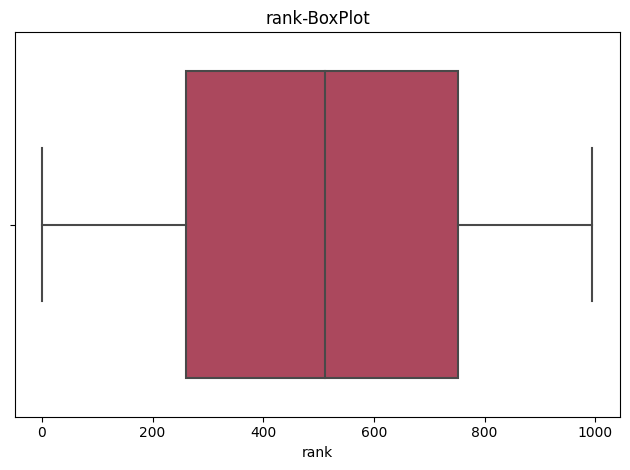

-----------------------------------------------------------------------------------



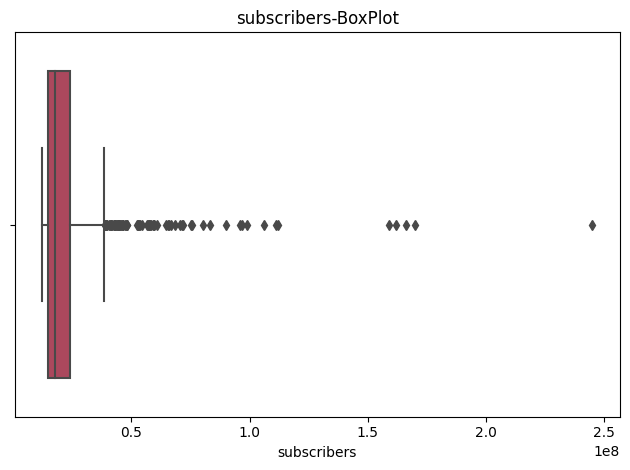

-----------------------------------------------------------------------------------



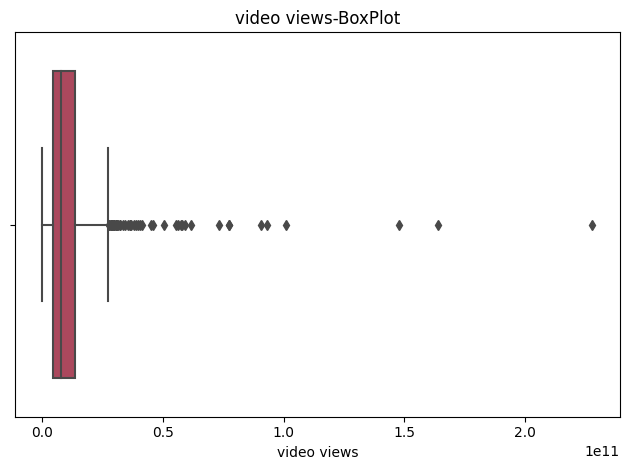

-----------------------------------------------------------------------------------



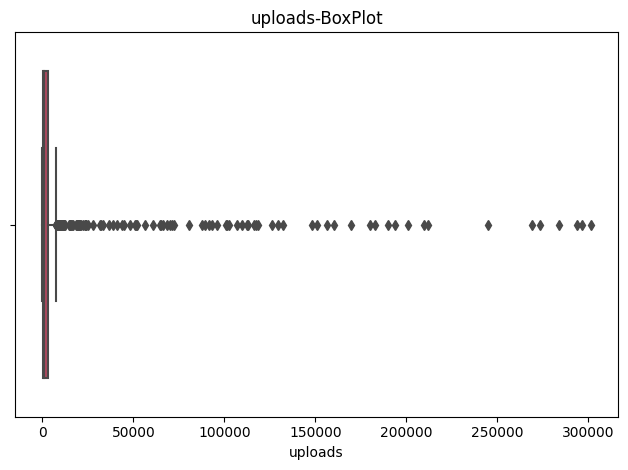

-----------------------------------------------------------------------------------



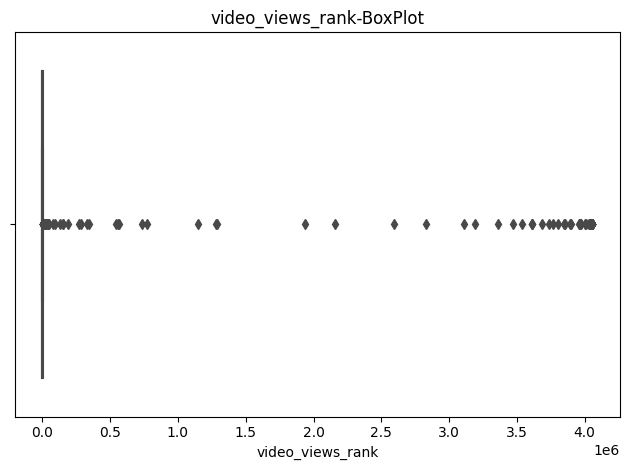

-----------------------------------------------------------------------------------



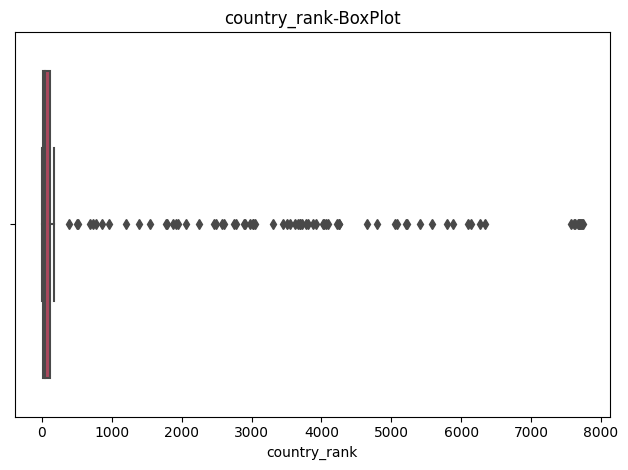

-----------------------------------------------------------------------------------



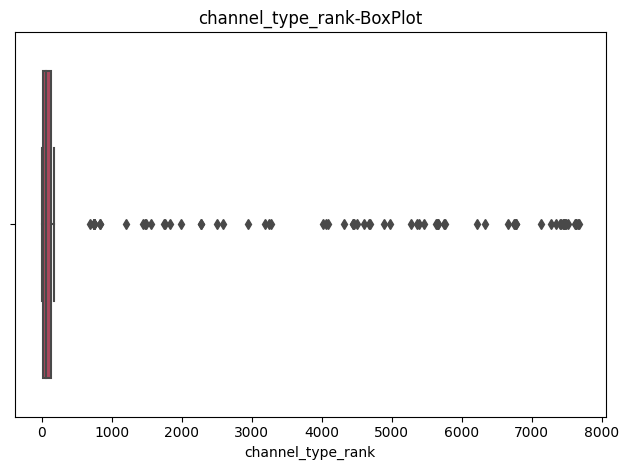

-----------------------------------------------------------------------------------



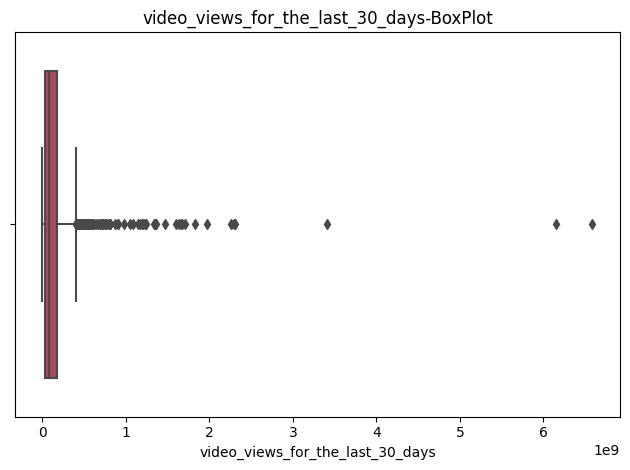

-----------------------------------------------------------------------------------



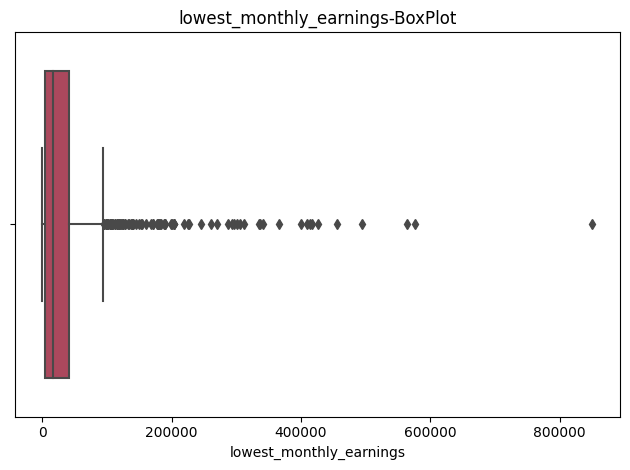

-----------------------------------------------------------------------------------



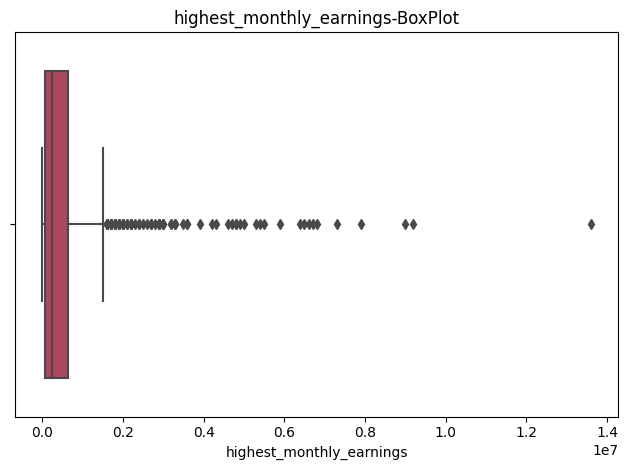

-----------------------------------------------------------------------------------



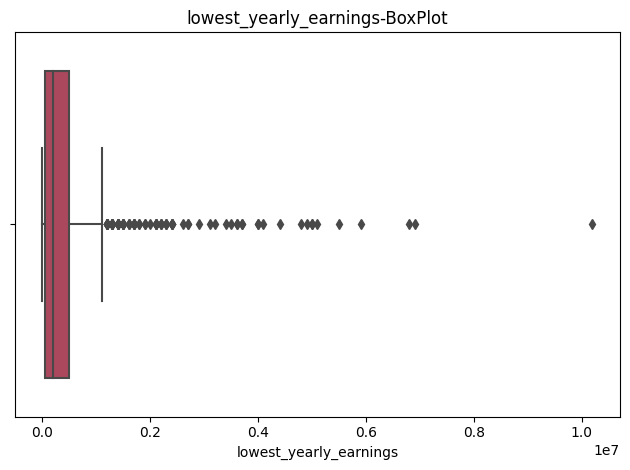

-----------------------------------------------------------------------------------



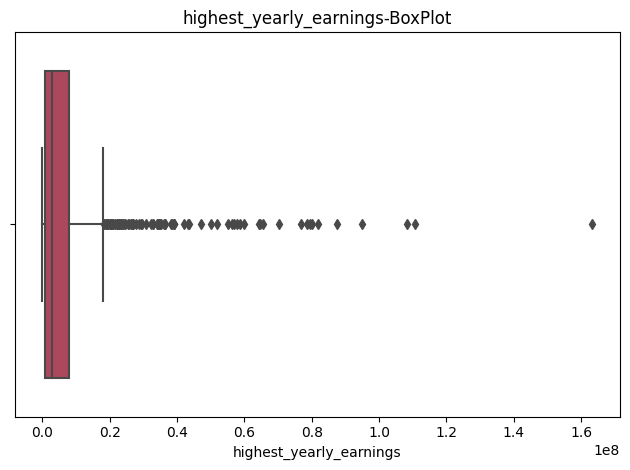

-----------------------------------------------------------------------------------



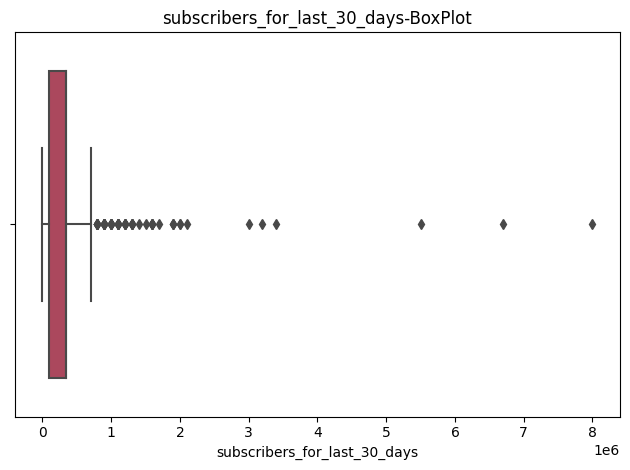

-----------------------------------------------------------------------------------



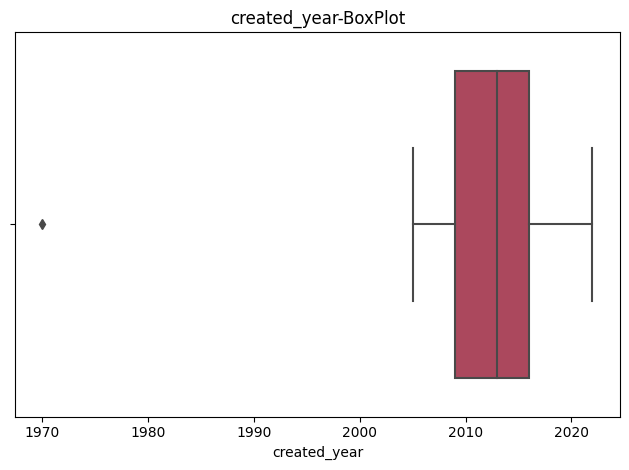

-----------------------------------------------------------------------------------



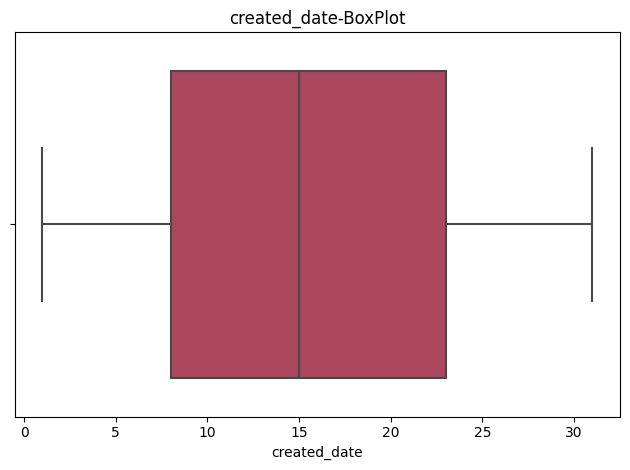

-----------------------------------------------------------------------------------



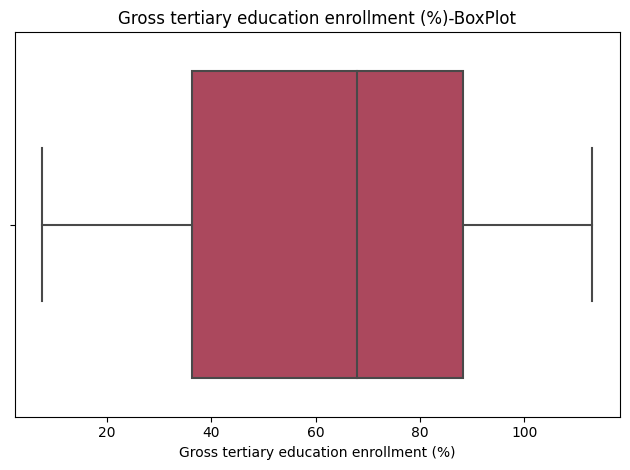

-----------------------------------------------------------------------------------



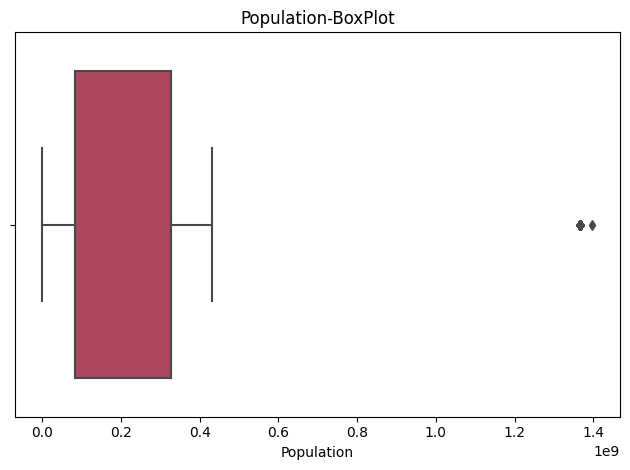

-----------------------------------------------------------------------------------



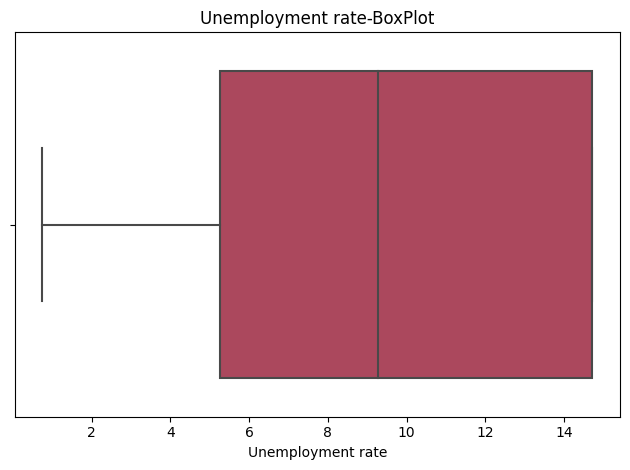

-----------------------------------------------------------------------------------



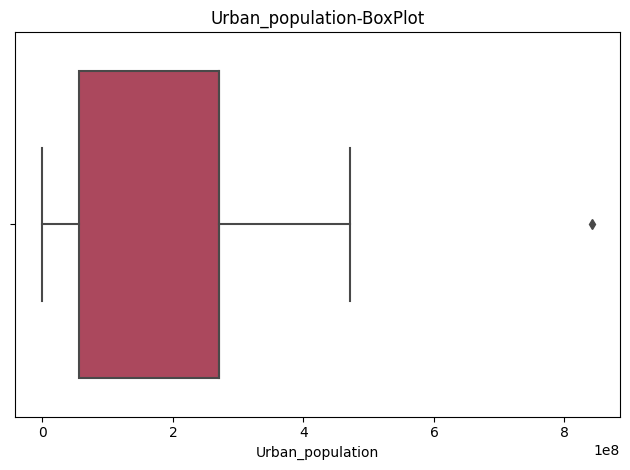

-----------------------------------------------------------------------------------



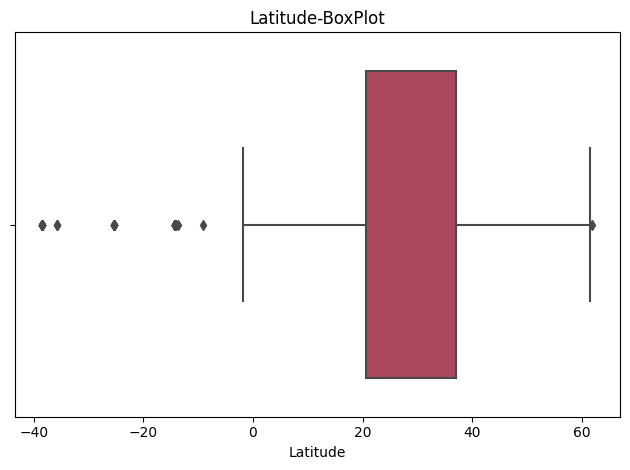

-----------------------------------------------------------------------------------



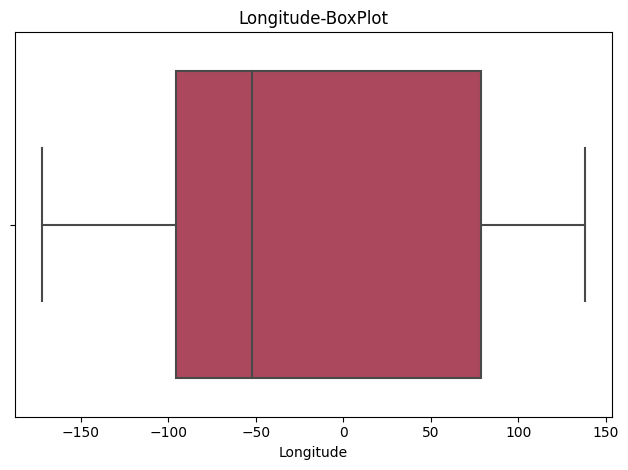

-----------------------------------------------------------------------------------



In [20]:
for col in nums:
    sns.boxplot(data=df,x=col,palette="inferno")
    plt.title(f'{col}-BoxPlot')
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------",end="\n\n")

# AYKIRI DEĞERLERİ IQR İLE BASKILAMA

**IQR baskılama ile nümerik değişkenlerdeki alt ve üst sınırları ilk çeyrek (0.25) ve  3. çeyrek (0.75) ile kartiller farkını alarak alt sıır ve üst sınırı  oluşturuyoruz.**

In [21]:
df[nums]

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2.000000e+06,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,3.490791e+05,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8.000000e+06,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1.000000e+06,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1.000000e+06,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,1200,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,7.000000e+05,2017.0,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,1500,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,3.000000e+05,2018.0,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,2452,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,...,3.200000e+03,1.000000e+03,2006.0,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,39,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,1.000000e+05,2012.0,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [22]:

def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)  # 1. çeyrek
    Q3 = df[column].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1  # IQR hesaplama
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır
    # Aykırı değerleri sınırlar ile değiştirme
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Her bir nümerik değişken için IQR baskılama işlemi
for col in nums:
    iqr_capping(df, col)


/tmp/ipykernel_17/3544832788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipykernel_17/3544832788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipykernel_17/3544832788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [23]:
def baskılama(df,column):
        Q1 = df[column].quantile(0.25) 
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 -1.5*IQR #ALT SINIR
        upper_bound = Q3 +1.5*IQR#ÜST SINIR
        df.loc[:, column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [24]:
for col in nums:
    baskılama(df,col)

**Tekrar nümerik değşkenlerin boxplot grafiği ile gösterimi.**

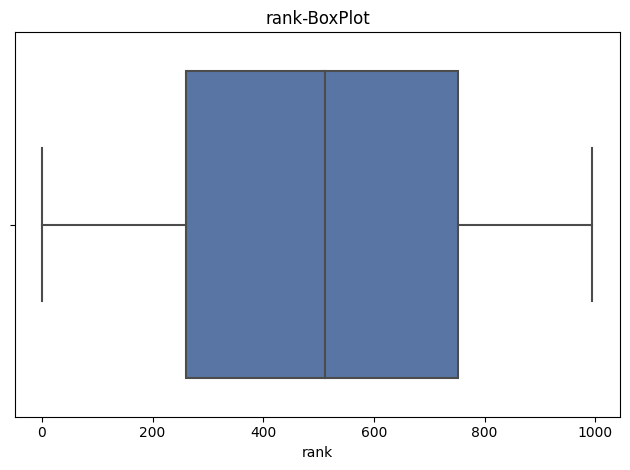

----------------------------------------------------------------------------------



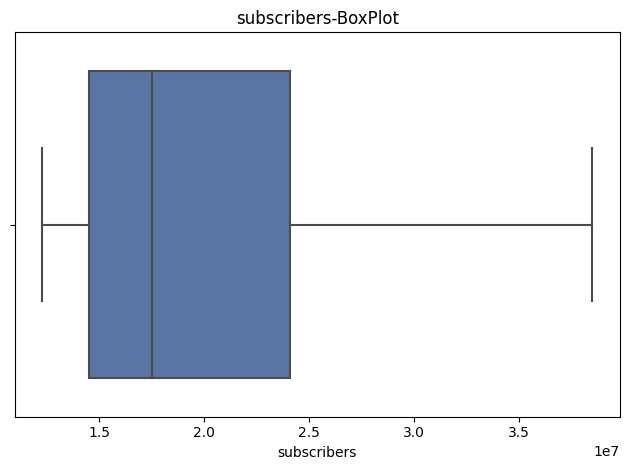

----------------------------------------------------------------------------------



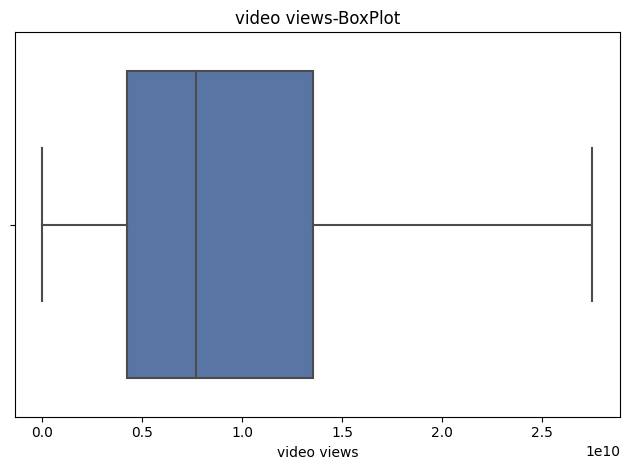

----------------------------------------------------------------------------------



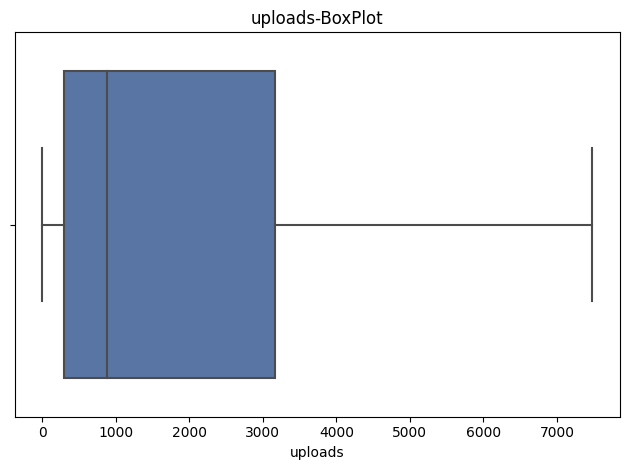

----------------------------------------------------------------------------------



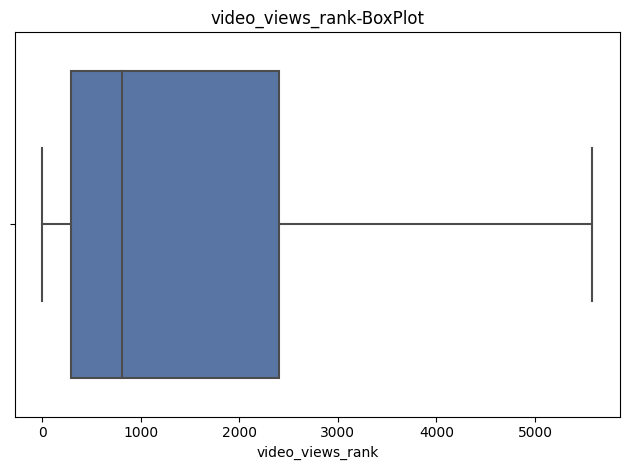

----------------------------------------------------------------------------------



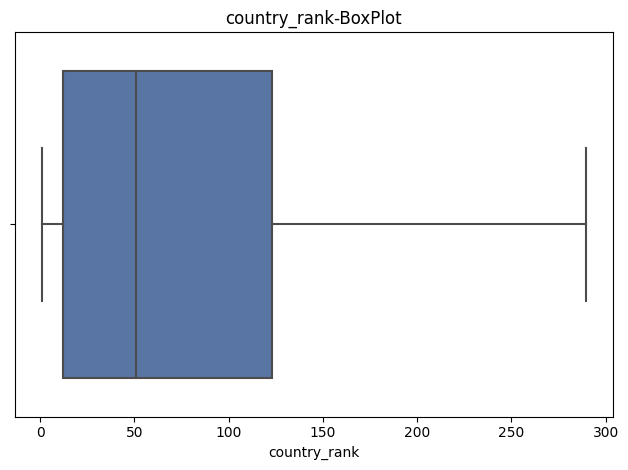

----------------------------------------------------------------------------------



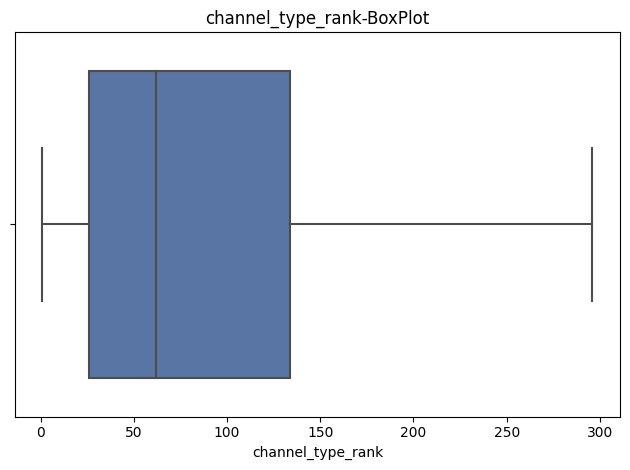

----------------------------------------------------------------------------------



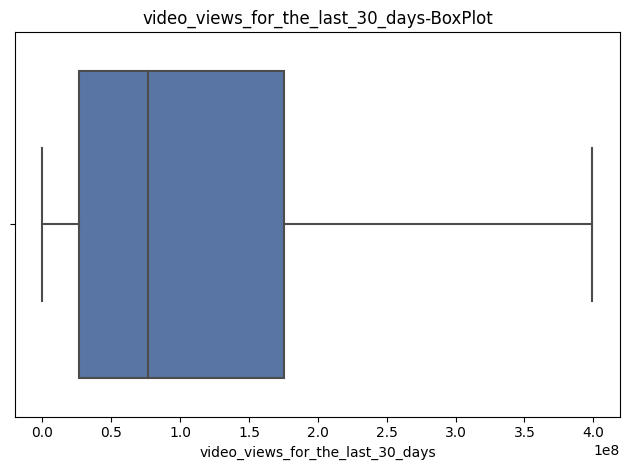

----------------------------------------------------------------------------------



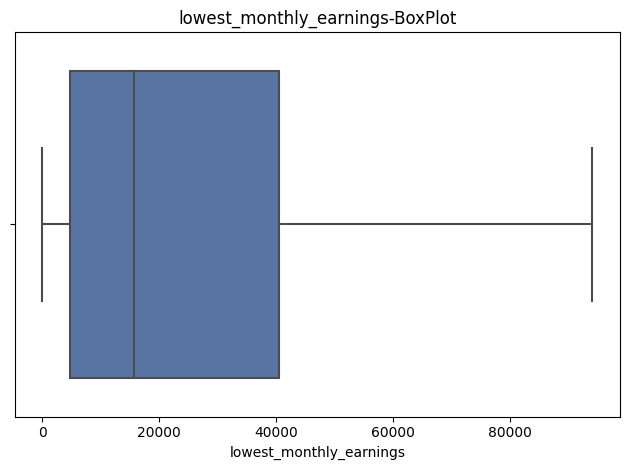

----------------------------------------------------------------------------------



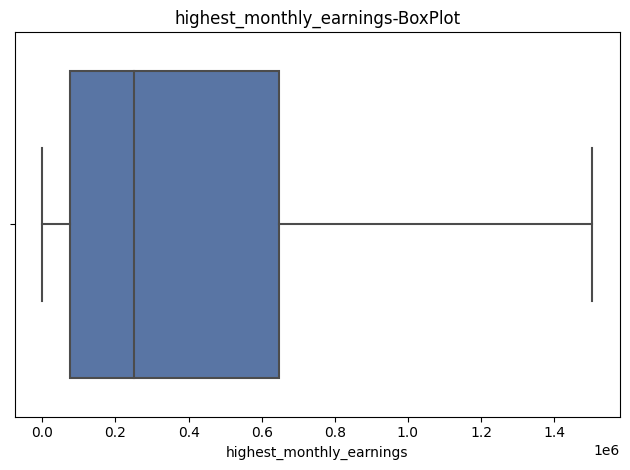

----------------------------------------------------------------------------------



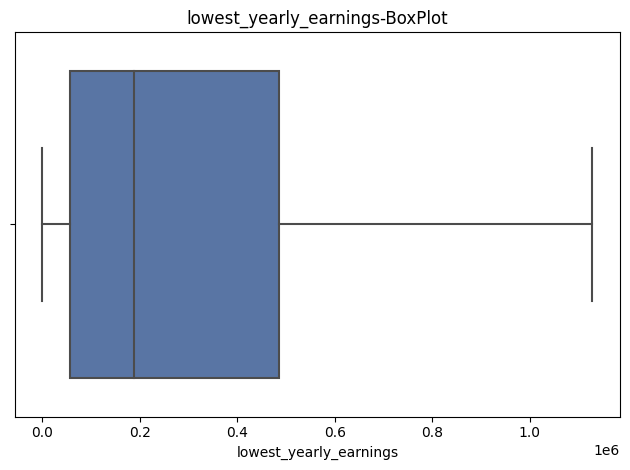

----------------------------------------------------------------------------------



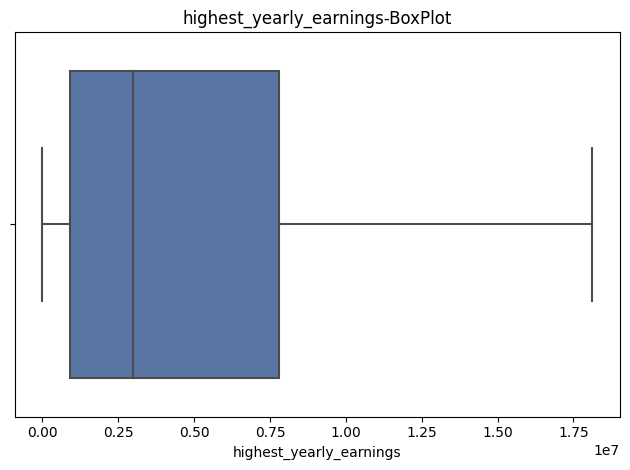

----------------------------------------------------------------------------------



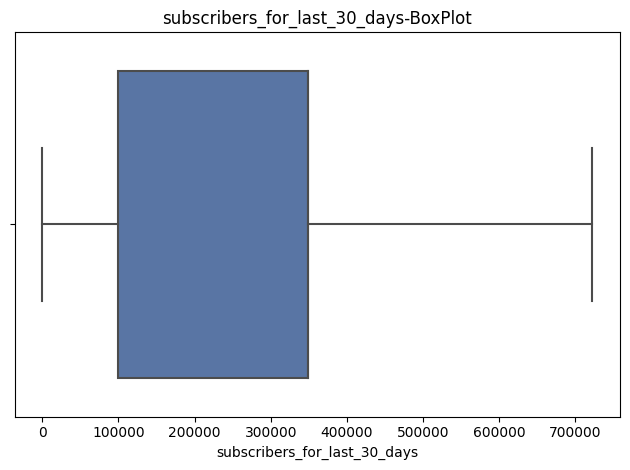

----------------------------------------------------------------------------------



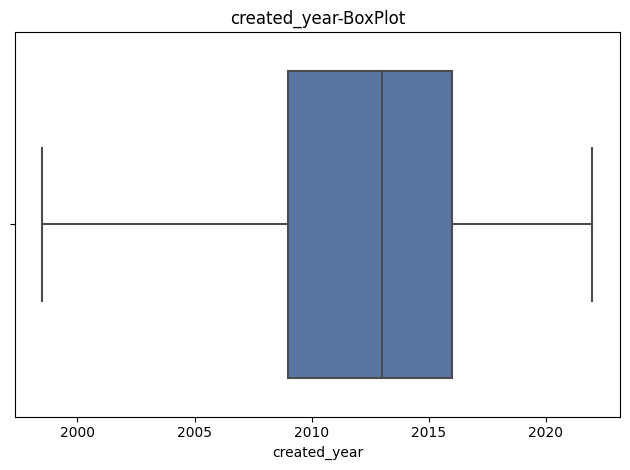

----------------------------------------------------------------------------------



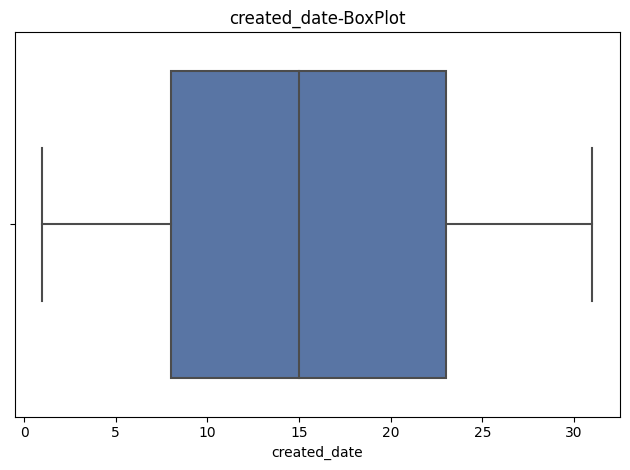

----------------------------------------------------------------------------------



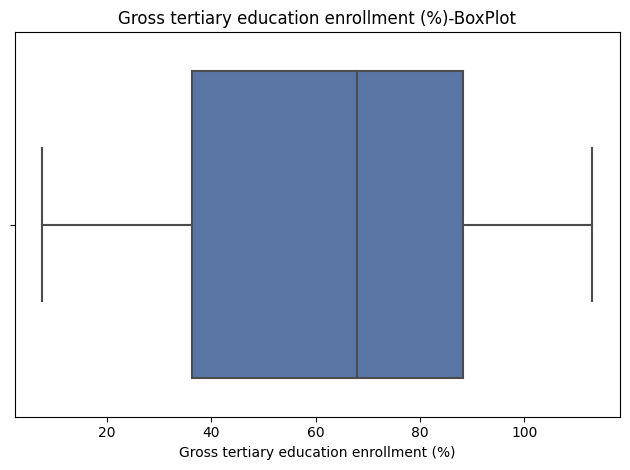

----------------------------------------------------------------------------------



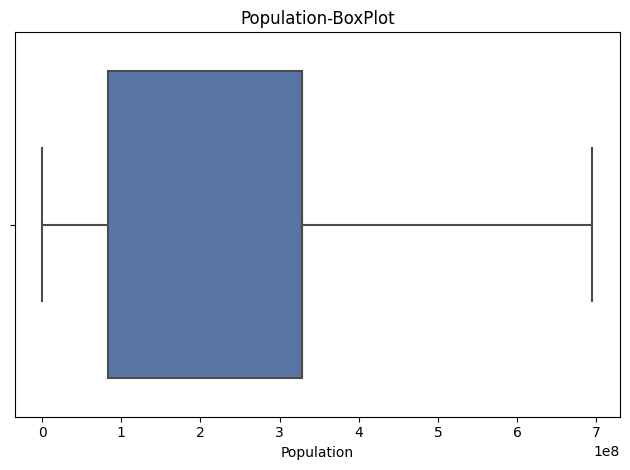

----------------------------------------------------------------------------------



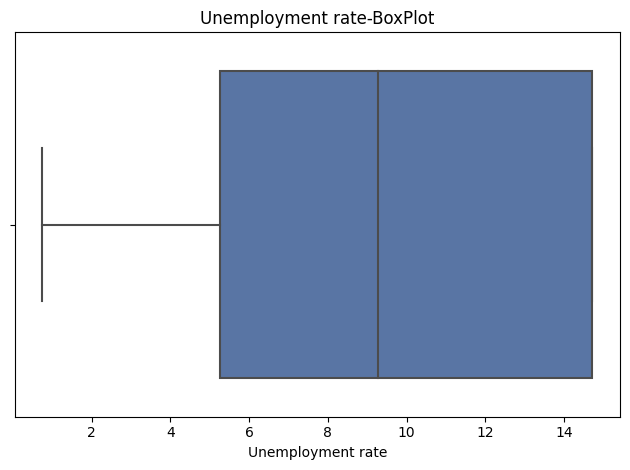

----------------------------------------------------------------------------------



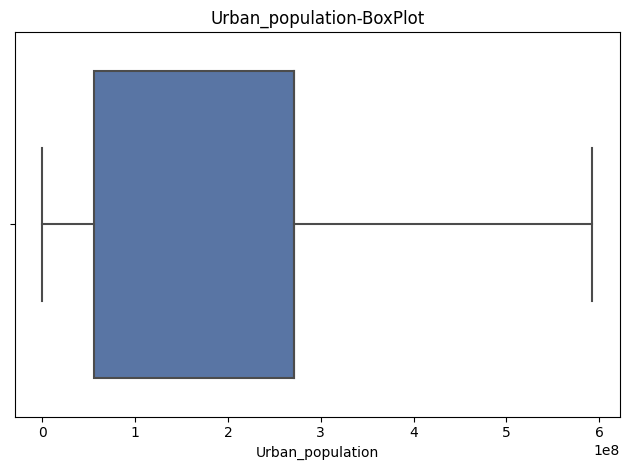

----------------------------------------------------------------------------------



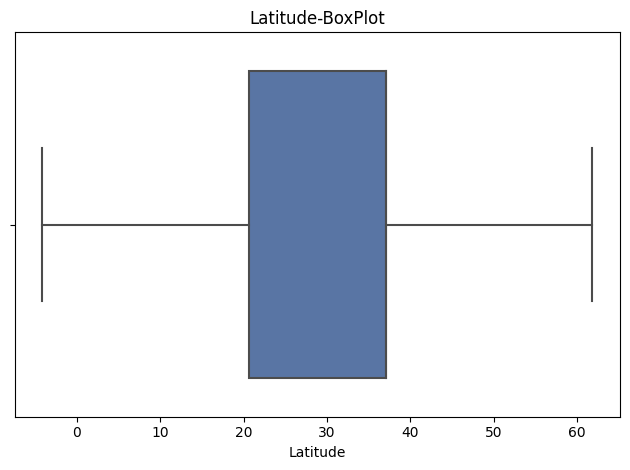

----------------------------------------------------------------------------------



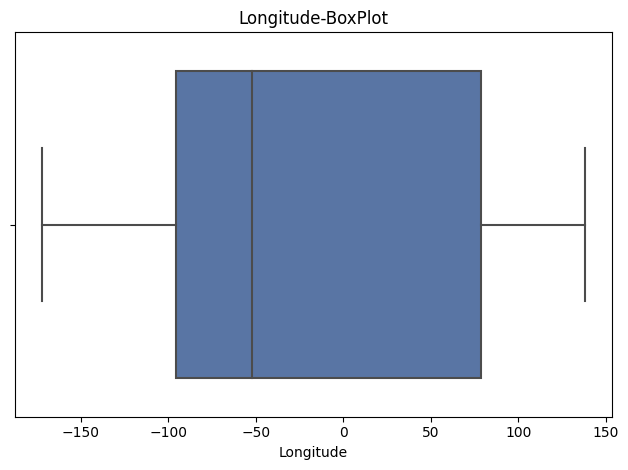

----------------------------------------------------------------------------------



In [25]:
for col in nums:
    sns.boxplot(data=df,x=col,palette='deep')
    plt.title(f'{col}-BoxPlot')
    plt.tight_layout()
    plt.show()
    print("----------------------------------------------------------------------------------",end="\n\n")

# Nümerik Değişkenler Arasındaki Korelasyon

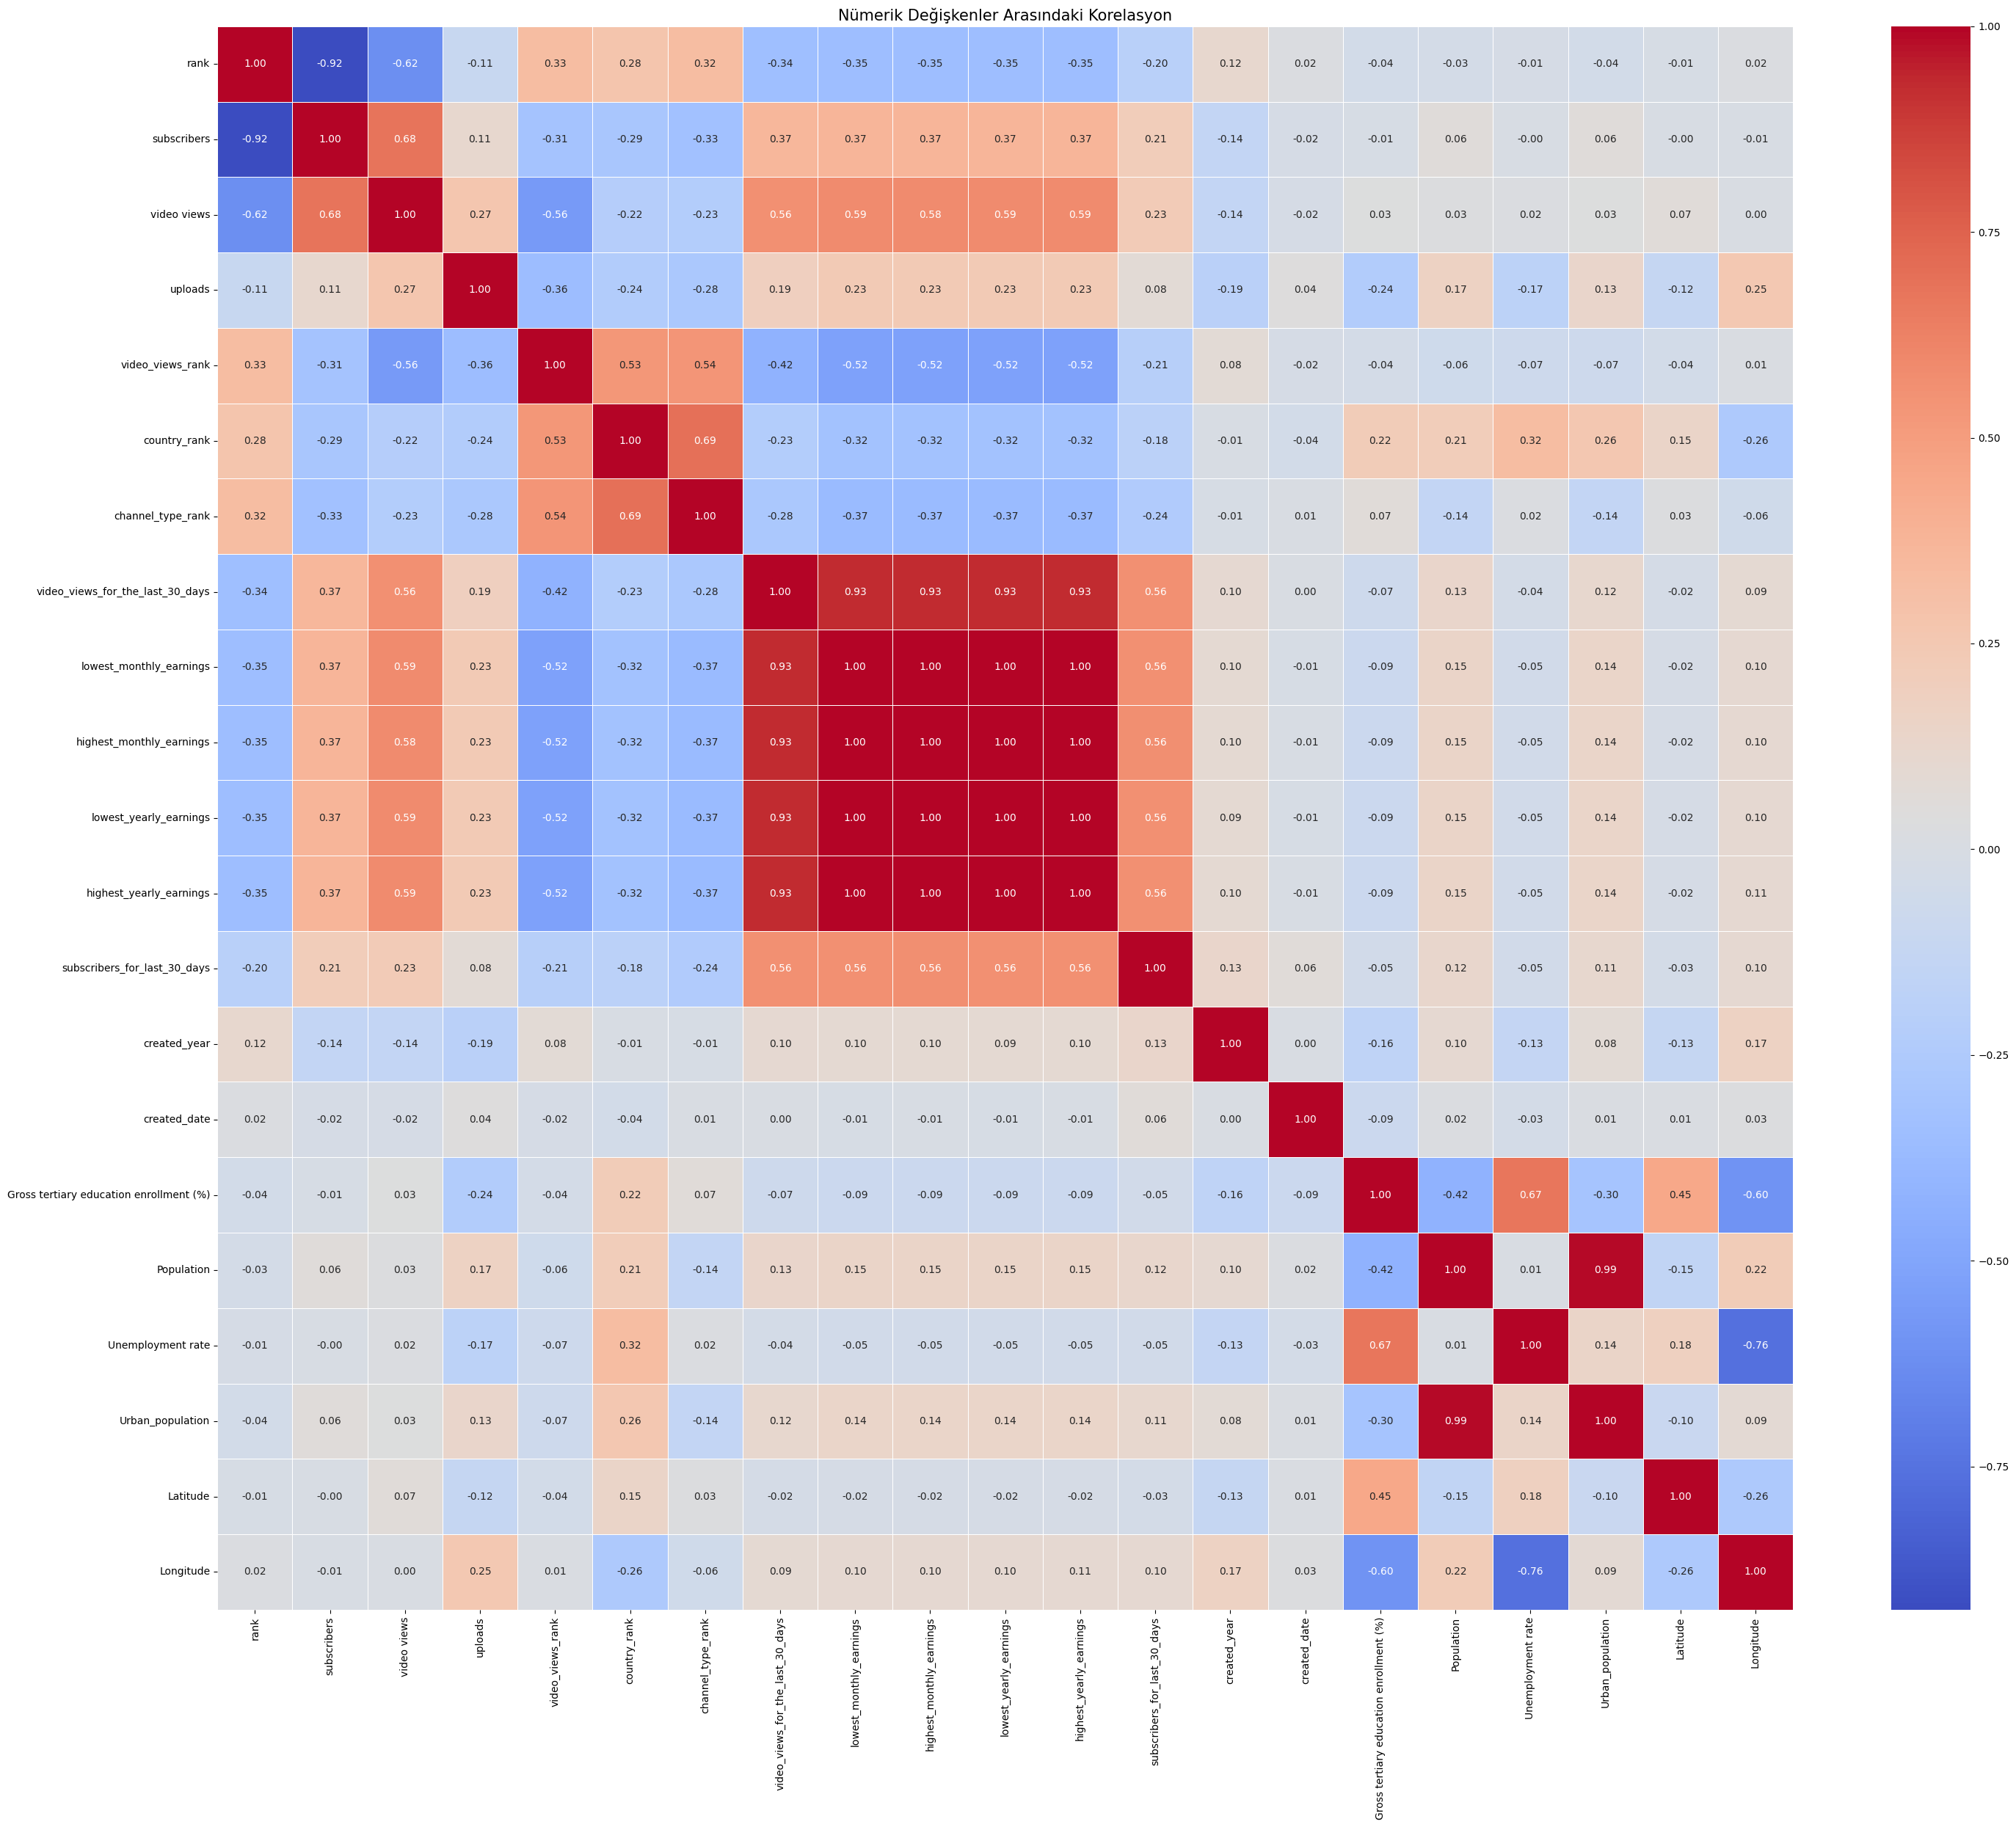

In [26]:
corr = df[nums].corr()

plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Nümerik Değişkenler Arasındaki Korelasyon', fontsize=15)
plt.tight_layout()
plt.show() 

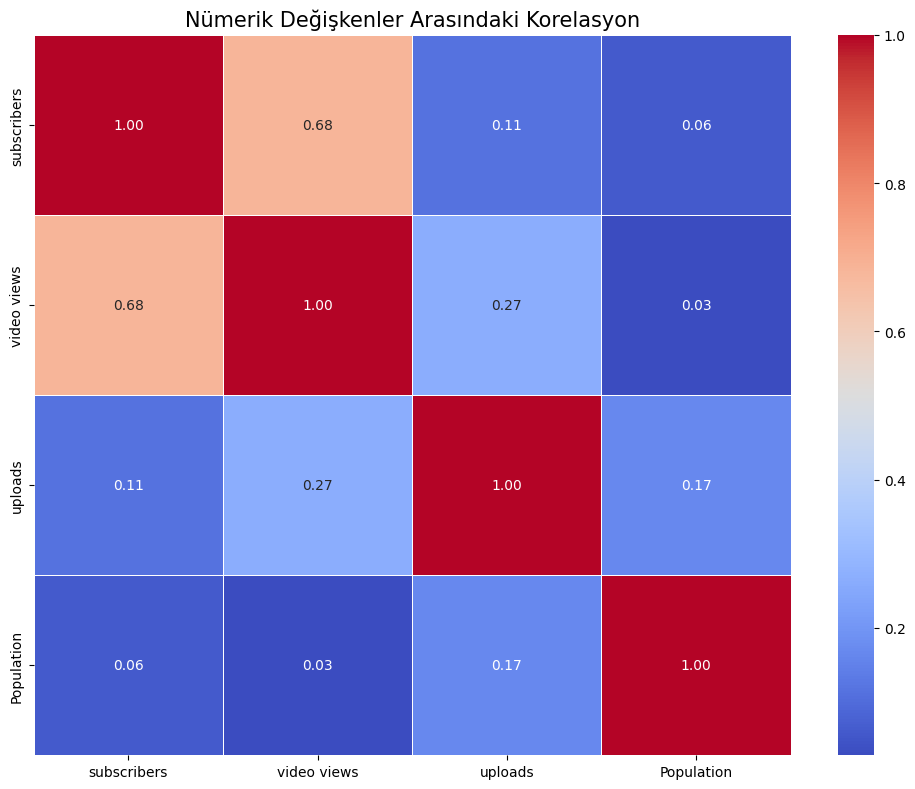

In [27]:
num_columns = ['subscribers', 'video views', 'uploads', 'Population']
corr = df[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Nümerik Değişkenler Arasındaki Korelasyon', fontsize=15)
plt.tight_layout()
plt.show()


**Görüntülenme Sayısı ve Abone Sayısı arasında 0.68 lik korelasyon dikkat çekiyor.Yani görüntülenme sayısına bağlı kısmen aynı oranda artıyor veya azalıyor diğerbiliriz.**

# KEŞİFSEL VERİ ANALİZİ (EDA)

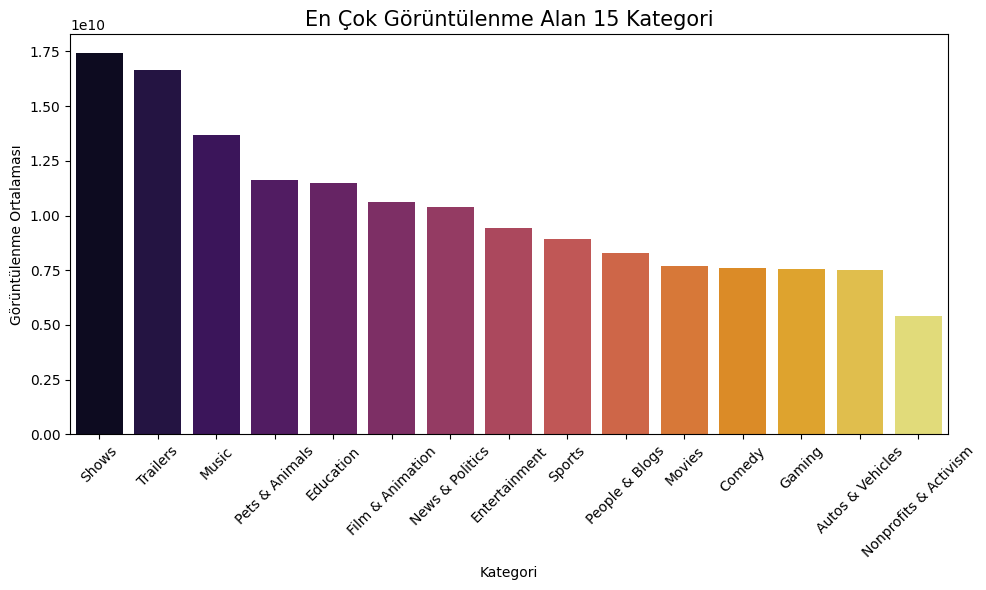

In [28]:
en_fazla_görüntülenme_alan_kategoriler = df.groupby("category",as_index=False)[["video views"]].mean().sort_values(by="video views",ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="category",y="video views",data=en_fazla_görüntülenme_alan_kategoriler,palette="inferno")
plt.title("En Çok Görüntülenme Alan 15 Kategori",fontsize=15)
plt.xlabel("Kategori",fontsize=10)
plt.ylabel("Görüntülenme Ortalaması",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

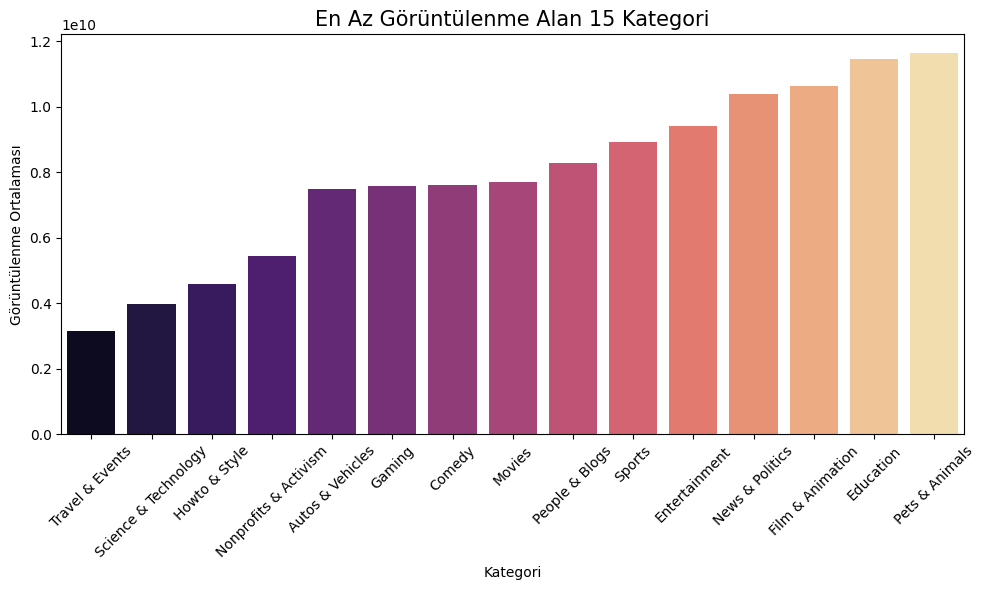

In [29]:
en_az_görüntülenme_alan_kategoriler = df.groupby("category",as_index=False)[["video views"]].mean().sort_values(by="video views").head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="category",y="video views",data=en_az_görüntülenme_alan_kategoriler,palette="magma")
plt.title("En Az Görüntülenme Alan 15 Kategori",fontsize=15)
plt.xlabel("Kategori",fontsize=10)
plt.ylabel("Görüntülenme Ortalaması",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

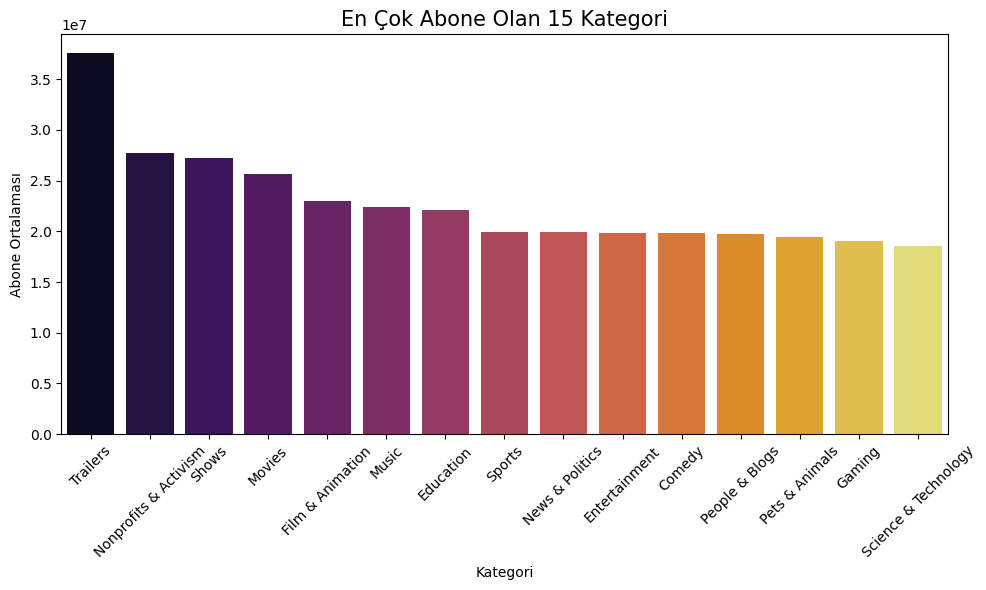

In [30]:
en_fazla_abone_alan_kategoriler = df.groupby("category",as_index=False)[["subscribers"]].mean().sort_values(by="subscribers",ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="category",y="subscribers",data=en_fazla_abone_alan_kategoriler,palette="inferno")
plt.title("En Çok Abone Olan 15 Kategori",fontsize=15)
plt.xlabel("Kategori",fontsize=10)
plt.ylabel("Abone Ortalaması",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

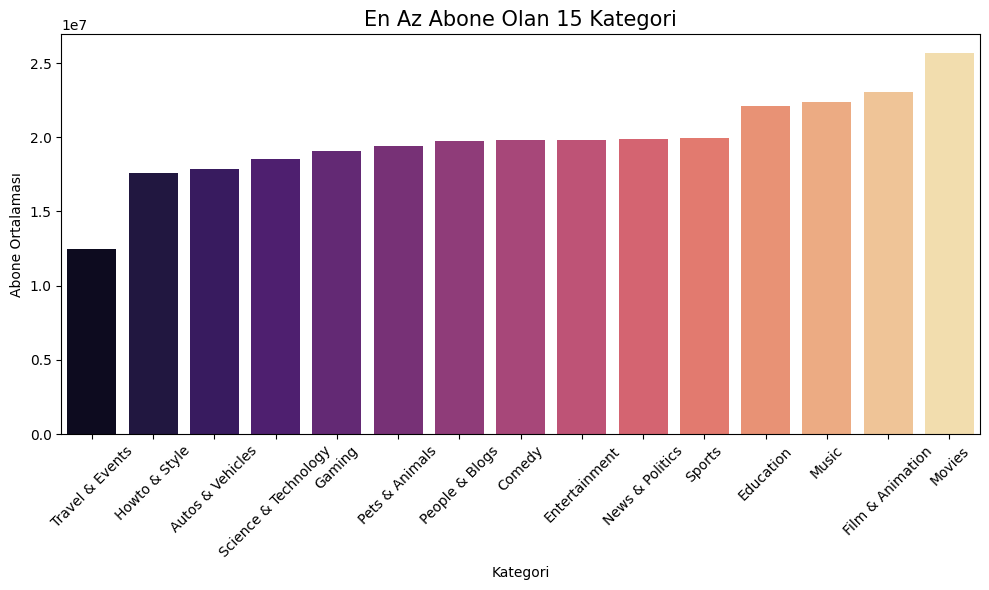

In [31]:
en_az_abone_alan_kategoriler = df.groupby("category",as_index=False)[["subscribers"]].mean().sort_values(by="subscribers").head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="category",y="subscribers",data=en_az_abone_alan_kategoriler,palette="magma")
plt.title("En Az Abone Olan 15 Kategori",fontsize=15)
plt.xlabel("Kategori",fontsize=10)
plt.ylabel("Abone Ortalaması",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

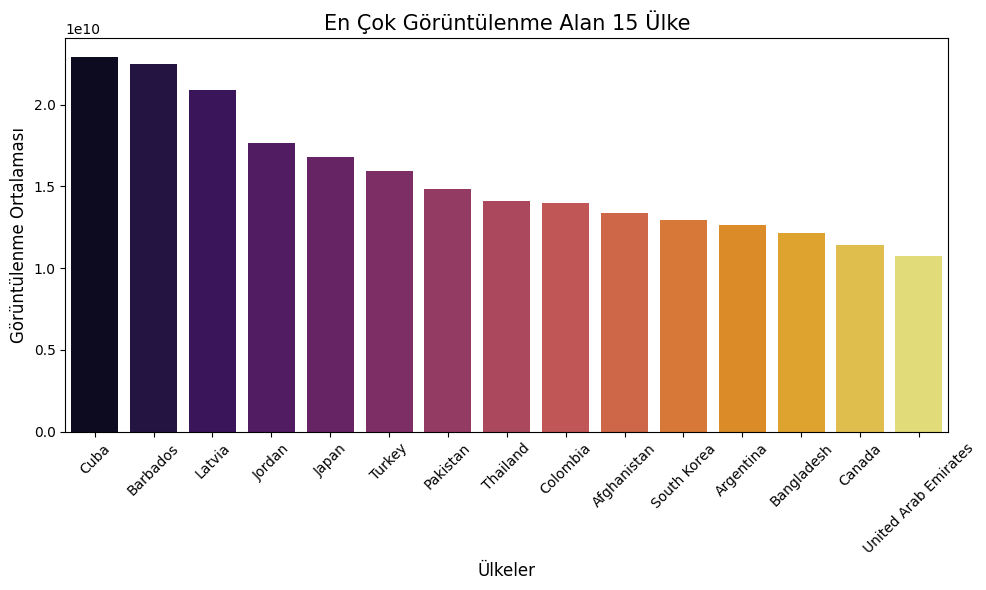

In [32]:
ülkelere_göre_görüntülenme_sayıları =df.groupby("Country",as_index=False)[["video views"]].mean().sort_values(by="video views",ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="Country",y="video views",data=ülkelere_göre_görüntülenme_sayıları,palette='inferno')
plt.title("En Çok Görüntülenme Alan 15 Ülke",fontsize=15)
plt.xlabel("Ülkeler",fontsize=12)
plt.ylabel("Görüntülenme Ortalaması",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

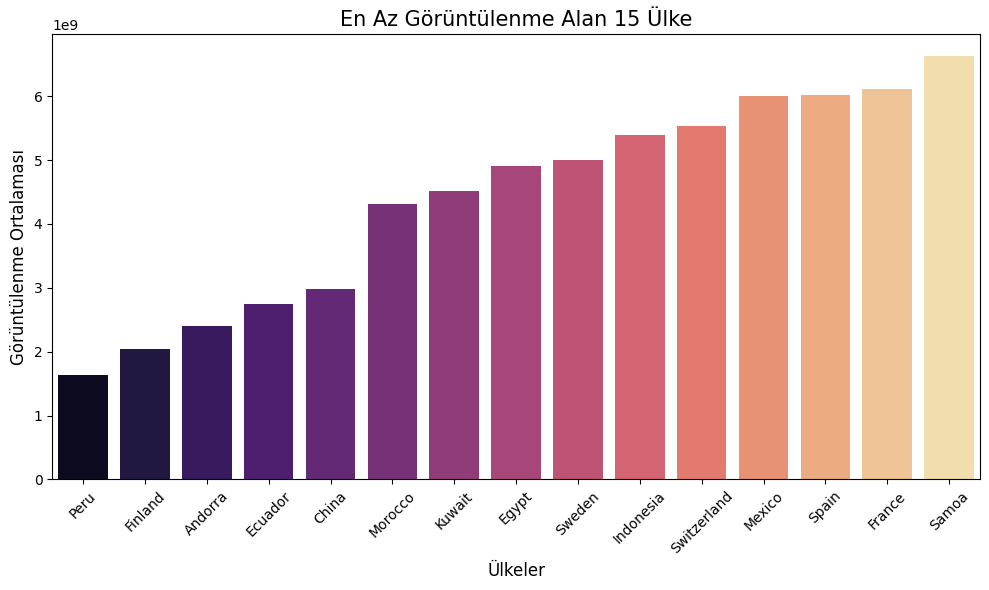

In [33]:
ülkelere_göre_görüntülenme_sayıları =df.groupby("Country",as_index=False)[["video views"]].mean().sort_values(by="video views").head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="Country",y="video views",data=ülkelere_göre_görüntülenme_sayıları,palette='magma')
plt.title("En Az Görüntülenme Alan 15 Ülke",fontsize=15)
plt.xlabel("Ülkeler",fontsize=12)
plt.ylabel("Görüntülenme Ortalaması",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

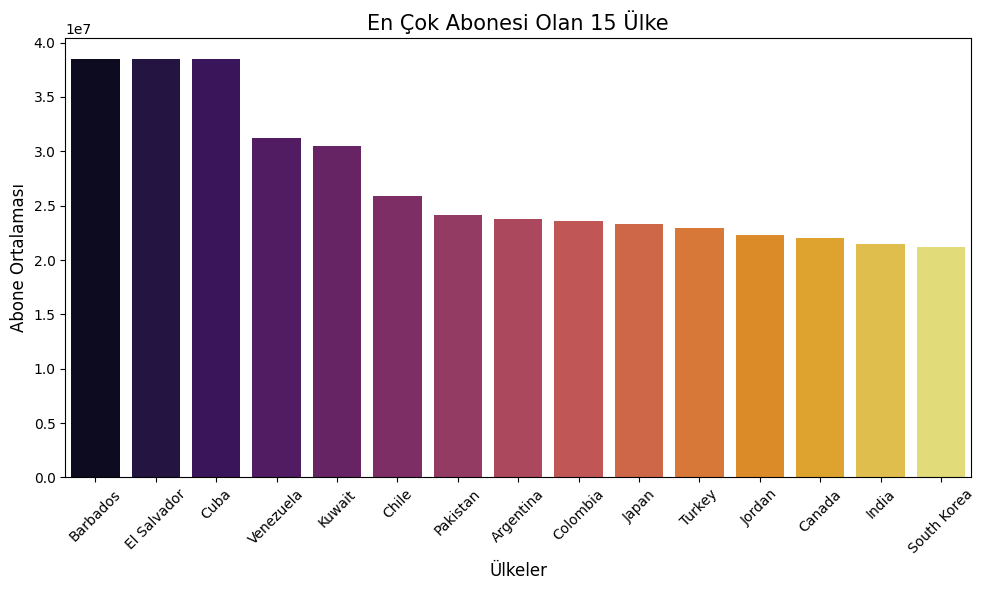

In [34]:
ülkelere_göre_görüntülenme_sayıları =df.groupby("Country",as_index=False)[["subscribers"]].mean().sort_values(by="subscribers",ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="Country",y="subscribers",data=ülkelere_göre_görüntülenme_sayıları,palette='inferno')
plt.title("En Çok Abonesi Olan 15 Ülke",fontsize=15)
plt.xlabel("Ülkeler",fontsize=12)
plt.ylabel("Abone Ortalaması",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

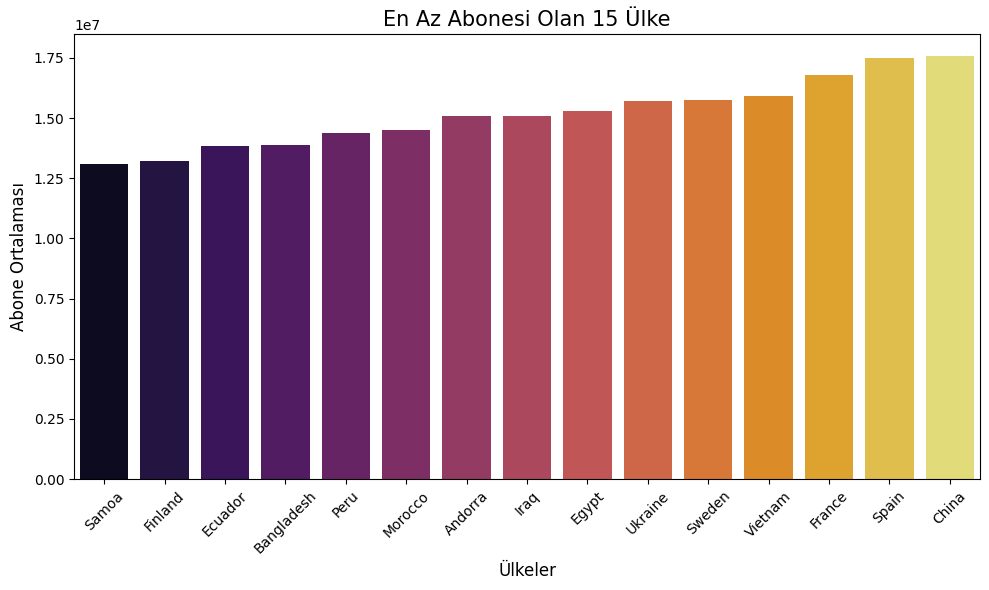

In [35]:
ülkelere_göre_görüntülenme_sayıları =df.groupby("Country",as_index=False)[["subscribers"]].mean().sort_values(by="subscribers").head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="Country",y="subscribers",data=ülkelere_göre_görüntülenme_sayıları,palette='inferno')
plt.title("En Az Abonesi Olan 15 Ülke",fontsize=15)
plt.xlabel("Ülkeler",fontsize=12)
plt.ylabel("Abone Ortalaması",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

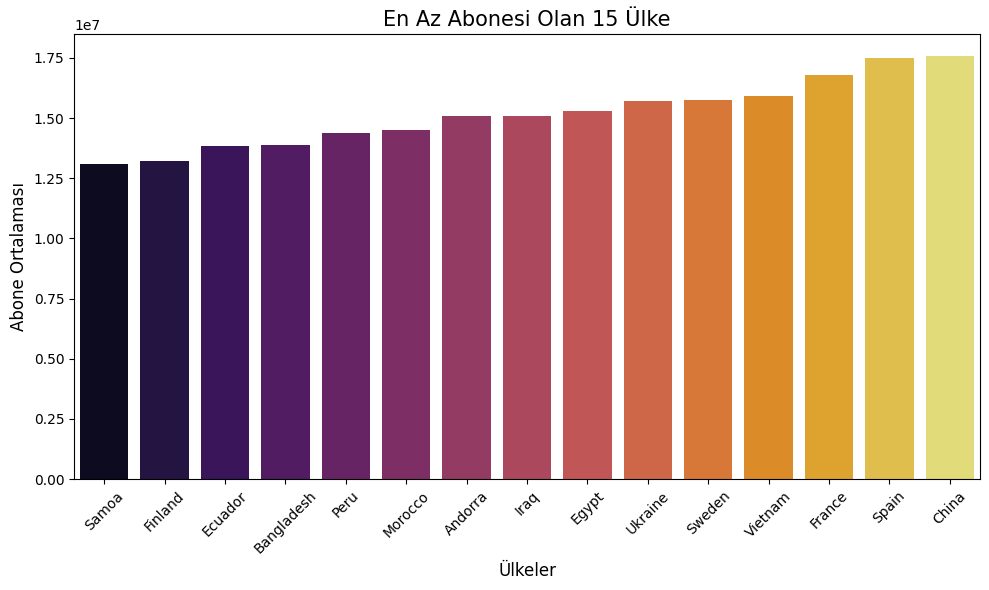

In [36]:
ülkelere_göre_görüntülenme_sayıları =df.groupby("Country",as_index=False)[["subscribers"]].mean().sort_values(by="subscribers").head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="Country",y="subscribers",data=ülkelere_göre_görüntülenme_sayıları,palette='inferno')
plt.title("En Az Abonesi Olan 15 Ülke",fontsize=15)
plt.xlabel("Ülkeler",fontsize=12)
plt.ylabel("Abone Ortalaması",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

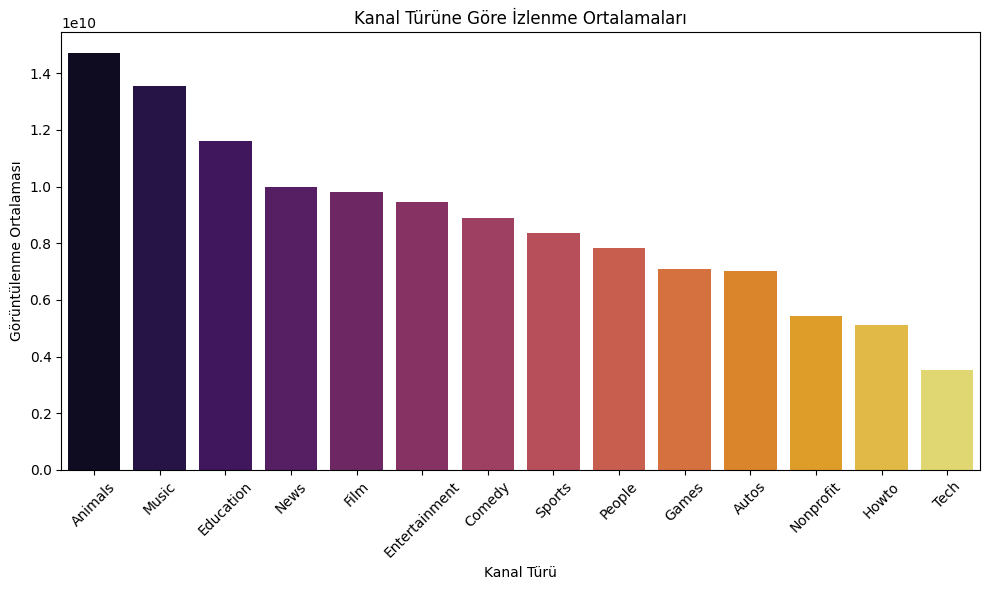

In [37]:
kanal_türüne_göre_görüntülenme = df.groupby("channel_type",as_index=False)[["video views"]].mean().sort_values(by="video views",ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(data=kanal_türüne_göre_görüntülenme,x="channel_type",y="video views",palette='inferno')
plt.title("Kanal Türüne Göre İzlenme Ortalamaları")
plt.xlabel("Kanal Türü",fontsize=10)
plt.ylabel("Görüntülenme Ortalaması",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


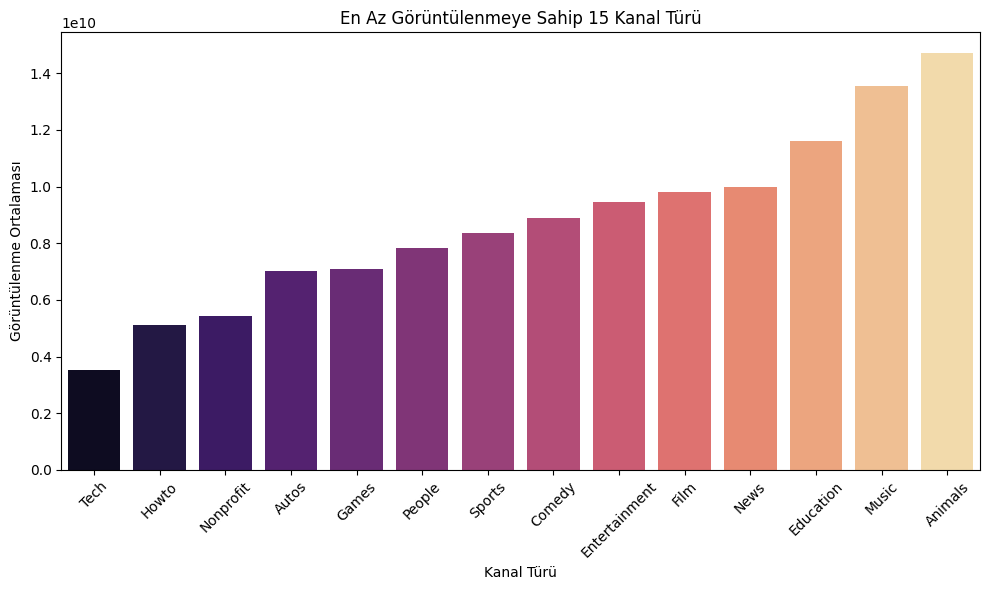

In [38]:
kanal_türüne_göre_görüntülenme = df.groupby("channel_type",as_index=False)[["video views"]].mean().sort_values(by="video views").head(15)
plt.figure(figsize=(10,6))
sns.barplot(data=kanal_türüne_göre_görüntülenme,x="channel_type",y="video views",palette='magma')
plt.title("En Az Görüntülenmeye Sahip 15 Kanal Türü")
plt.xlabel("Kanal Türü",fontsize=10)
plt.ylabel("Görüntülenme Ortalaması",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Eski ve Yeni Kanalların Abone Sayıları Karşılaştırması

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


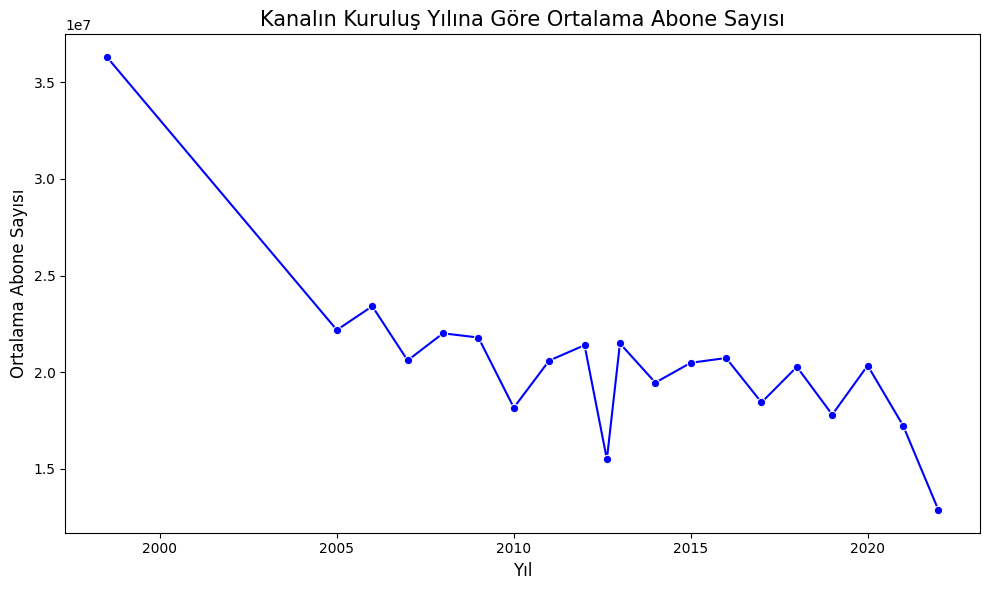

In [39]:
yearly_subscribers = df.groupby('created_year', as_index=False)['subscribers'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x='created_year', y='subscribers', data=yearly_subscribers, marker='o', color='b')
plt.title('Kanalın Kuruluş Yılına Göre Ortalama Abone Sayısı', fontsize=15)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Ortalama Abone Sayısı', fontsize=12)
plt.tight_layout()
plt.show()


# A/B TESTLERİ(Eski ve Yeni Kanalların Abone Sayıları Karşılaştırması)

**Hipotezlerin Kurulması**

**Hipotez (H0): Eski ve yeni kanallar arasında ortalama abone sayısı açısından anlamlı bir fark yoktur**.

**Alternatif Hipotez (H1): Eski ve yeni kanallar arasında ortalama abone sayısı açısından anlamlı bir fark vardır.**


**Değişken İsimleri**

In [40]:
created_year_col = 'created_year' #Kanal Kuruluş Yılı
subscribers_col = 'subscribers'  #Abone Sayısı

**2015 öncesi ve sonrası kanalları ayırma**

In [41]:

old_channels = df[df[created_year_col] < 2015]
new_channels = df[df[created_year_col] >= 2015]


**Her gruptan rastgele 20 kanal seçme**


In [42]:
old_sample = old_channels[subscribers_col].dropna().sample(25, random_state=42)
new_sample = new_channels[subscribers_col].dropna().sample(25, random_state=42)

**Verilerin Dağılımını Görselleştirme**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


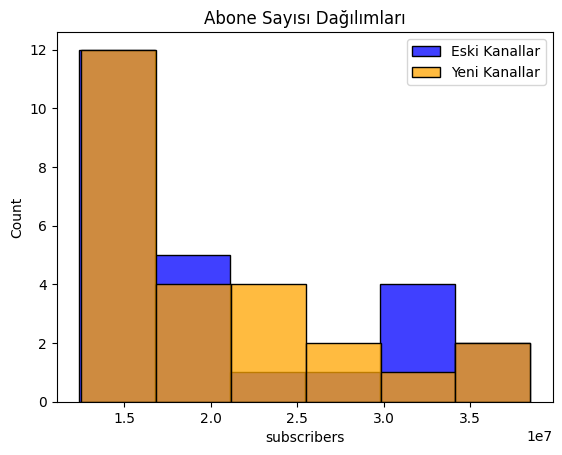

In [43]:
sns.histplot(old_sample,color="blue", label="Eski Kanallar")
sns.histplot(new_sample,color="orange", label="Yeni Kanallar")
plt.legend()
plt.title("Abone Sayısı Dağılımları")
plt.show()


**Normallik Testi**

**İki grup için de n<30 olduğundan dolayı verilerin normal dağılıp dağılmadıklarını shapiro wilk testi yardımıyla bulacağız.**


**H0:Eski kanallar normal dağılmıştır.**
**H1:Eski kanallar normal dağılmamıştır.**


--------------------------------------------------------------

**H0:Yeni kanallar normal dağılmıştır.**
**H1:Yeni kanallar normal dağılmamıştır.**

Eski Kanallar (Old Sample):


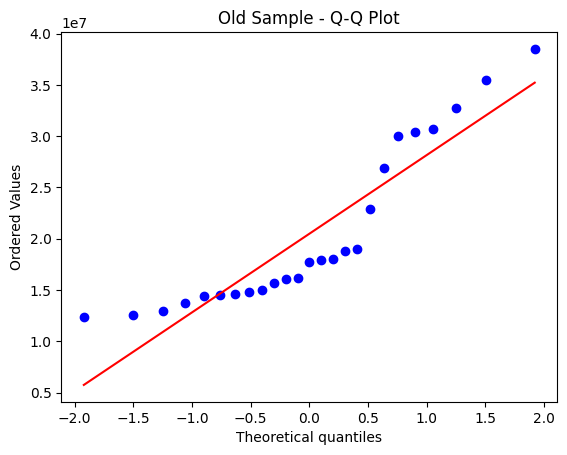

Old Sample Shapiro-Wilk P-Değeri: 0.0010
-------------------------------------------------------

Yeni Kanallar (New Sample):


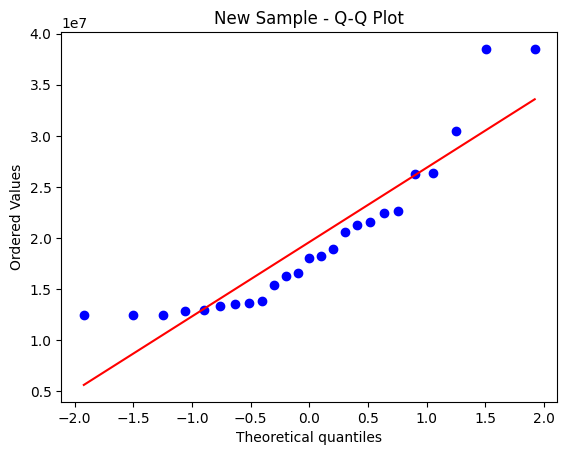

New Sample Shapiro-Wilk P-Değeri: 0.0011
-------------------------------------------------------



In [44]:

def plot_group_normality(group_data, group_name):

    # Q-Q Plot
    stats.probplot(group_data, dist="norm", plot=pylab)
    plt.title(f"{group_name} - Q-Q Plot")
    plt.show()

    # Shapiro-Wilk Normallik Testi
    p_value = stats.shapiro(group_data).pvalue
    print(f"{group_name} Shapiro-Wilk P-Değeri: {p_value:.4f}")
    print("-------------------------------------------------------", end="\n\n")

# Gruplar için normallik grafikleri ve test sonuçları
print("Eski Kanallar (Old Sample):")
plot_group_normality(old_sample, "Old Sample")

print("Yeni Kanallar (New Sample):")
plot_group_normality(new_sample, "New Sample")


In [45]:
print("Eski Kanallar Normallik Testi:", shapiro(old_sample))
print("Yeni Kanallar Normallik Testi:", shapiro(new_sample))

Eski Kanallar Normallik Testi: ShapiroResult(statistic=0.8356031599233332, pvalue=0.0009501456051559492)
Yeni Kanallar Normallik Testi: ShapiroResult(statistic=0.8383210345783401, pvalue=0.0010656088591036387)


**YORUM**




**Her iki grupun p value değeri alfa değerinden küçük olduğu için H0 reddedilir Yani %95 güvenle her iki grubunda verileri normal dağılmamıştır**.

**Test Fonksiyonu**

In [46]:
def perform_ab_test(old_sample, new_sample, alpha=0.05):
 
    # Normallik testi
    old_normality = shapiro(old_sample).pvalue > alpha
    new_normality = shapiro(new_sample).pvalue > alpha

    # Varyans homojenliği testi
    levene_p_value = levene(old_sample, new_sample).pvalue
    homogeneity = levene_p_value > alpha

    # Test seçimi
    if old_normality and new_normality:
        if homogeneity:
            # Normallik ve varyans homojenliği sağlanıyorsa bağımsız t-testi
            t_stat, p_value = ttest_ind(old_sample, new_sample)
            test_name = "Bağımsız Örneklem T-Testi"
        else:
            # Normallik sağlanıyor ama varyans homojenliği sağlanmıyorsa Welch's t-testi
            t_stat, p_value = ttest_ind(old_sample, new_sample, equal_var=False)
            test_name = "Welch's T-Test"
    else:
        # Normallik sağlanmıyorsa non-parametrik test
        t_stat, p_value = mannwhitneyu(old_sample, new_sample)
        test_name = "Mann-Whitney U Test"

    # Sonuçları döndürme
    return test_name, t_stat, p_value, homogeneity

# Test sonuçlarını yazdırma fonksiyonu
def print_test_results(test_name, t_stat, p_value, homogeneity, alpha=0.05):
    print(f"{test_name} Sonuçları:")
    print(f"T-Statistik: {t_stat}, P-Değeri: {p_value}")
    print(f"Varyans Homojenliği: {'Evet' if homogeneity else 'Hayır'}")
    if p_value < alpha:
        print("Sonuç: H₀ reddedilir. Eski ve yeni kanallar arasında anlamlı bir fark vardır.")
    else:
        print("Sonuç: H₀ reddedilemez. Eski ve yeni kanallar arasında anlamlı bir fark yoktur.")


In [47]:
perform_ab_test(old_sample, new_sample, alpha=0.05)

('Mann-Whitney U Test', 333.0, 0.6979048808175352, True)

**Test sonuçlarını yazdırma fonksiyonu**


In [48]:
# Test sonuçlarını yazdırma fonksiyonu
def print_test_results(test_name, t_stat, p_value, homogeneity, alpha=0.05):
    print(f"{test_name} Sonuçları:")
    print(f"T-Statistik: {t_stat}, P-Değeri: {p_value}")
    print(f"Varyans Homojenliği: {'Evet' if homogeneity else 'Hayır'}")
    if p_value < alpha:
        print("Sonuç: H₀ reddedilir. Eski ve yeni kanallar arasında anlamlı bir fark vardır.")
    else:
        print("Sonuç: H₀ reddedilemez. Eski ve yeni kanallar arasında anlamlı bir fark yoktur.")


In [49]:
print_test_results('Mann-Whitney U Test',  333.0, 0.6979048808175352, True, alpha=0.05)

Mann-Whitney U Test Sonuçları:
T-Statistik: 333.0, P-Değeri: 0.6979048808175352
Varyans Homojenliği: Evet
Sonuç: H₀ reddedilemez. Eski ve yeni kanallar arasında anlamlı bir fark yoktur.


**Veriler normal dağılmadığından dolayı Mann-Whitney U Test yaptım.Homojenliğe gerek duymuyoruz eğer verilerimiz normal dağılmıyorsa  bağımsız iki grup karşılaştırma testinde direkt olarak Mann-Whitney U Testi yapıyoruz**

# SONUÇ VE YORUM

**Eski ve Yeni kanallar normal dağılım göstermiş olup yapılan testlerde %95 güvenle eski ve yeni kanal görüntülenme sayıları ortalmalarını kıyasladığımıda P value(0.69)>alfa(0.05) olduğu için H0  %95 güvenle reddedilemez Yani 2015 yılından önce kurulmuş bir kanalın görüntülenme sayıları ortalaması ile 2015 den sonra kurulmuş bir kanalın görüntülenme sayıları ortalamaları arasında fark yoktur.**